<h2> 1. Business Problem </h2>

<text>Operating a local restaurant is not a menial task. There are constant challenges which are
confronted by restaurant owners. One common obstacle that is found is the prediction of the
number of visitors in order to efficiently purchase ingredients and schedule staff members. This
forecast is dependent upon multitude of factors and is not easy to predict. </text>
<br>
<text>
Some of the dynamic factors include local restaurant competition, climate situation and strength of visitors. New
restaurants have more challenges as they have less historical data of their customers.
 </text>
<br>
<text>
Recruit Holdings is a human resources company headquartered in Japan. It has access to
datasets that can be utilised for automatic prediction of customers. Specifically, Recruit Holdings owns Hot Pepper Gourmet (a restaurant review service), AirREGI (a restaurant point of sales
service), and Restaurant Board (reservation log management software). </text>
<br>
<text>
 The main beneficiary of this prediction will be restaurant owners. They can distribute their resources efficiently within a limited budget and can fabricate pleasant dining experience for their consumers </text>

In [142]:
#importing different libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<h2> 2. Performance Metric </h2>

<text> The Performance metric is <b> Root Mean Squared Logarithmic Error </b> which is calculated as : </text>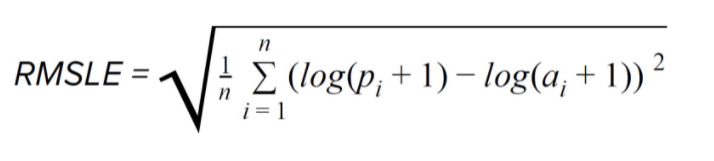
<text> Where:
 <br>
    <b> n </b>is the total number of observations
<br>
    <b>p_i </b>is our prediction of visitors
<br>
    <b>a_i </b>is the actual number of visitors
<br>
    <b>log(x)</b> is the natural logarithm of x </text>
    
<text>
    This performance metric is used over RMSE due to its robustness to outliers and when we want to penalise the underestimation more than the overestimation. In this business scenario, more customers will mean more profitability for restaurants. However if they get less customers on regular basis, the business won't be sustainable in the longer term. There might be cases when the customer count can be show a slow drift or a sudden jump due to some festival or national holiday.

<h2>3. Overview of Data Files </h2>

In [2]:
air_reserve = pd.read_csv("air_reserve.csv")
air_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   air_store_id      92378 non-null  object
 1   visit_datetime    92378 non-null  object
 2   reserve_datetime  92378 non-null  object
 3   reserve_visitors  92378 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [3]:
hpg_reserve = pd.read_csv("hpg_reserve.csv")
hpg_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   hpg_store_id      object
 1   visit_datetime    object
 2   reserve_datetime  object
 3   reserve_visitors  int64 
dtypes: int64(1), object(3)
memory usage: 61.0+ MB


In [2]:
air_store_info = pd.read_csv("air_store_info.csv")
air_store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   air_store_id    829 non-null    object 
 1   air_genre_name  829 non-null    object 
 2   air_area_name   829 non-null    object 
 3   latitude        829 non-null    float64
 4   longitude       829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


In [3]:
hpg_store_info = pd.read_csv("hpg_store_info.csv")
hpg_store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hpg_store_id    4690 non-null   object 
 1   hpg_genre_name  4690 non-null   object 
 2   hpg_area_name   4690 non-null   object 
 3   latitude        4690 non-null   float64
 4   longitude       4690 non-null   float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


In [6]:
store_id_relation = pd.read_csv("store_id_relation.csv")
store_id_relation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   air_store_id  150 non-null    object
 1   hpg_store_id  150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [7]:
air_visit_data = pd.read_csv("air_visit_data.csv")
air_visit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   air_store_id  252108 non-null  object
 1   visit_date    252108 non-null  object
 2   visitors      252108 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


In [8]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32019 entries, 0 to 32018
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        32019 non-null  object
 1   visitors  32019 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.4+ KB


In [9]:
date_info = pd.read_csv("date_info.csv")
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   calendar_date  517 non-null    object
 1   day_of_week    517 non-null    object
 2   holiday_flg    517 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.2+ KB


In [43]:
#Training Data 
print("Training Data Information"+"-"*100)
print("Total number of air  and hpg  restaurants are {0} and {1}".format(len(air_store_info.air_store_id.unique()),
                                                                  len(hpg_store_info.hpg_store_id.unique())))
print("Total number of reservations made in air and hpg restaurants are {0} and {1}".format(len(air_reserve.reserve_visitors),
                                                                                           len(hpg_reserve.reserve_visitors)))
print("Average number of visitors for air restaurants is {0}".format(air_visit_data.visitors.mean()))
print("Training Time Starts from {0} to {1}".format(air_visit_data.visit_date.min(),air_visit_data.visit_date.max()))
print(air_visit_data.head(5))
print("\n\n\n")
print("Testing Data Information"+"-"*101)
sample_submission['air_store_id'] = sample_submission['id'].map(lambda temp: '_'.join(temp.split('_')[:2]))
sample_submission['visit_date'] = sample_submission['id'].map(lambda temp: str(temp).split('_')[2])
print("Testing Time Starts from {0} to {1}".format(sample_submission.visit_date.min(),sample_submission.visit_date.max()))
print(sample_submission.head(5))

Training Data Information----------------------------------------------------------------------------------------------------
Total number of air  and hpg  restaurants are 829 and 4690
Total number of reservations made in air and hpg restaurants are 92378 and 2000320
Average number of visitors for air restaurants is 20.973761245180636
Training Time Starts from 2016-01-01 to 2017-04-22
           air_store_id  visit_date  visitors
0  air_ba937bf13d40fb24  2016-01-13        25
1  air_ba937bf13d40fb24  2016-01-14        32
2  air_ba937bf13d40fb24  2016-01-15        29
3  air_ba937bf13d40fb24  2016-01-16        22
4  air_ba937bf13d40fb24  2016-01-18         6




Testing Data Information-----------------------------------------------------------------------------------------------------
Testing Time Starts from 2017-04-23 to 2017-05-31
                                id  visitors          air_store_id  visit_date
0  air_00a91d42b08b08d9_2017-04-23         0  air_00a91d42b08b08d9  2017-04-2

<h2> 4. Checking Missing Values </h2>

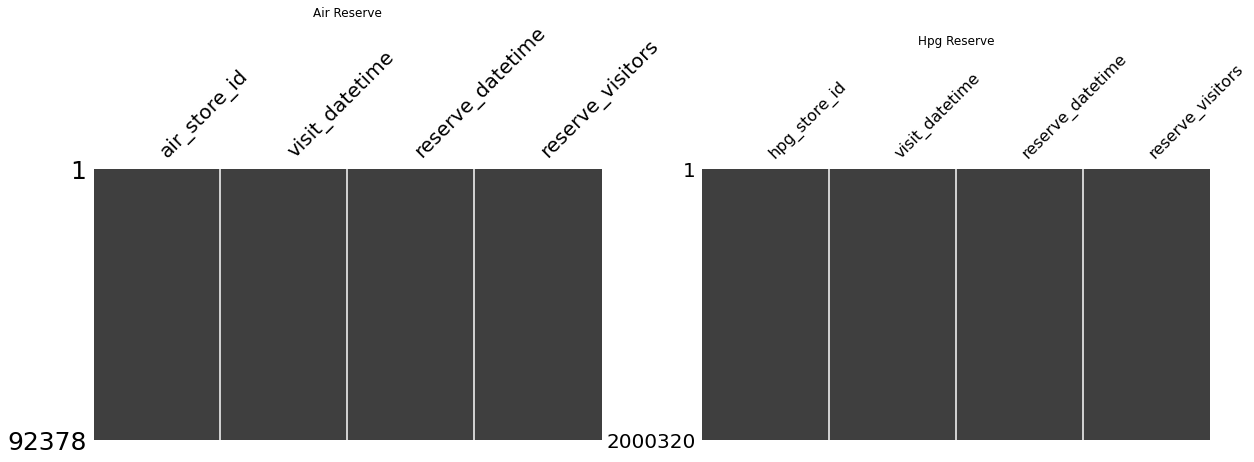

In [82]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax1.title.set_text("Air Reserve")
msno.matrix(air_reserve,ax=ax1,fontsize=20)


ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text("Hpg Reserve")
msno.matrix(hpg_reserve,ax=ax2)


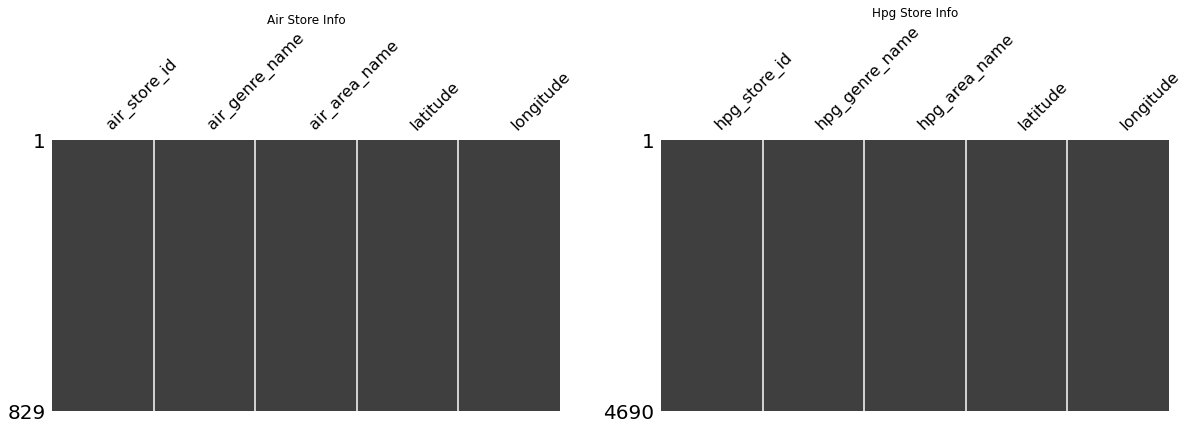

In [83]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax1.title.set_text("Air Store Info")
msno.matrix(air_store_info,ax=ax1)


ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text("Hpg Store Info")
msno.matrix(hpg_store_info,ax=ax2)

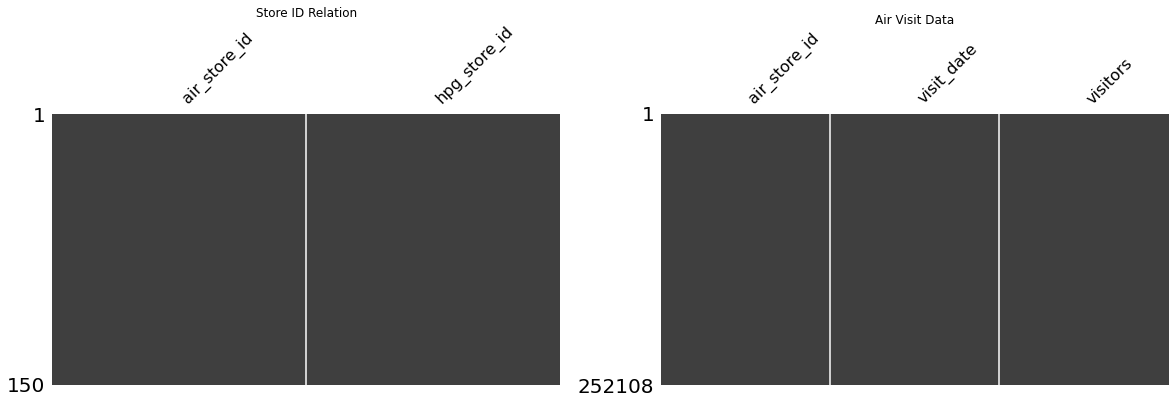

In [86]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax1.title.set_text("Store ID Relation")
msno.matrix(store_id_relation,ax=ax1,sparkline=False)


ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text("Air Visit Data")
msno.matrix(air_visit_data,ax=ax2,sparkline=False)

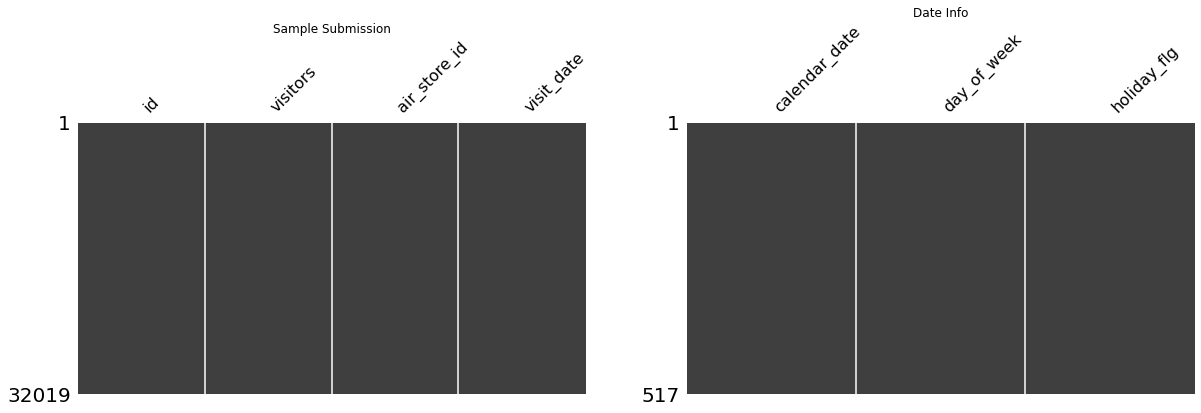

In [44]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax1.title.set_text("Sample Submission")
msno.matrix(sample_submission,ax=ax1,sparkline=False)


ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text("Date Info")
msno.matrix(date_info,ax=ax2,sparkline=False)

>**Observations**
>1. As we can see in the given data files, there are no missing values.
>2. There is no requirement for any data imputation technique.

## 5. Univariate Analysis

### 5.1. Air Visit Data

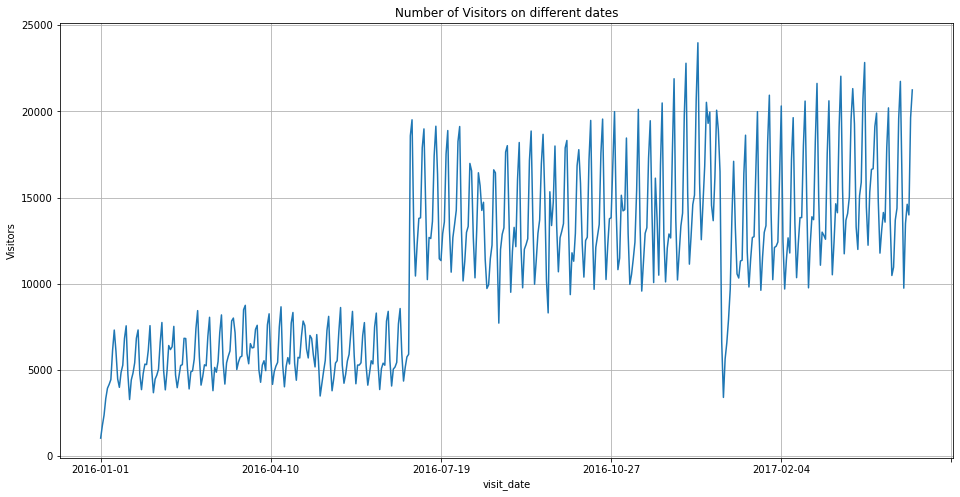

In [132]:
#number of visitors on specific date
fig,ax = plt.subplots(1,1,figsize=(16,8))
visitor_data = air_visit_data.groupby(['visit_date'])['visitors'].sum()
visitor_data.plot(grid="True",ax=ax)
plt.ylabel("Visitors")
plt.title('Number of Visitors on different dates')
plt.show()

>**Observations**
>1. There is a weekly long term pattern in time series. This pattern may be due to weekdays and weekends.
>2. For the first six months of 2016, there is less crowd witnessed, but afterwards, the crowd has significantly increased.
>3. There is a sudden dip in 2017 beginning, this may be due to the new year eve

In [99]:
air_visit_data['visitors'].describe()

count    252108.000000
mean         20.973761
std          16.757007
min           1.000000
25%           9.000000
50%          17.000000
75%          29.000000
max         877.000000
Name: visitors, dtype: float64

In [100]:
#finding 90th to 100th percentile
for i in range(90,100):
    var =air_visit_data['visitors'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 43
91 percentile value is 44
92 percentile value is 46
93 percentile value is 48
94 percentile value is 50
95 percentile value is 52
96 percentile value is 55
97 percentile value is 58
98 percentile value is 64
99 percentile value is 73
100 percentile value is  877


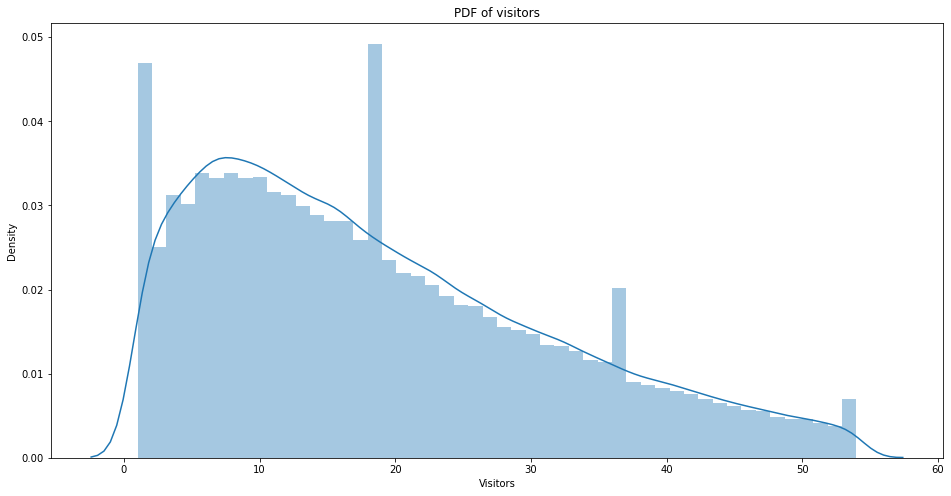

In [142]:
#pdf of visitors count 
data = air_visit_data[air_visit_data['visitors']<55]['visitors']
fig,ax = plt.subplots(1,1,figsize=(16,8))
sns.distplot(a=data.values)
plt.title("PDF of visitors")
plt.xlabel('Visitors')
plt.ylabel('Density')
plt.show()

>**Observations**
>1. The pdf of visitors is quite similar to postively skewed distirbution.
>2. The highest number of visitor count is 877

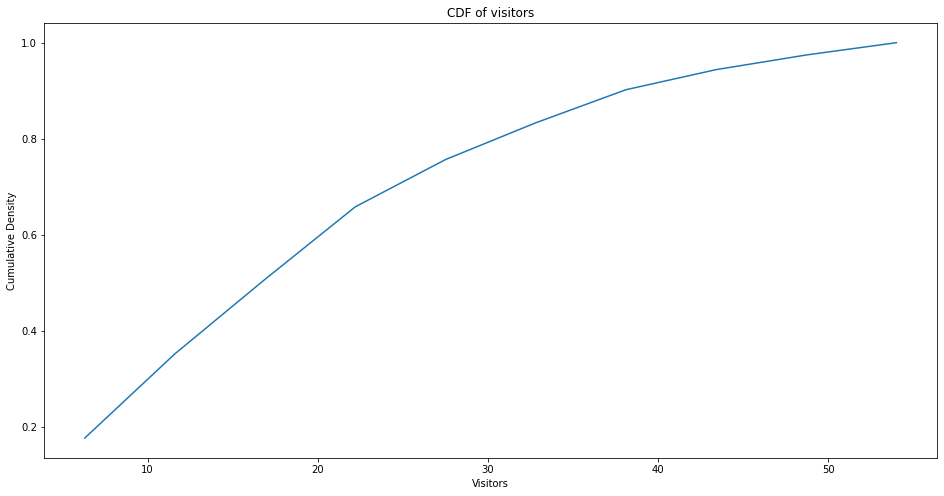

In [141]:
#cdf of number of visitors
fig,axis = plt.subplots(1,1, figsize=(16,8))
counts, bin_edges = np.histogram(air_visit_data[air_visit_data['visitors']<55]['visitors'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.ylabel('Cumulative Density')
plt.xlabel('Visitors')
plt.title('CDF of visitors')
plt.show()

>**Observations**
>1. In the above graph, we can observe that 90% of restaurants have visitors less than 40.
>2. It can be concluded from this graph, that most number of restaurants don't have capacity for 100 customers

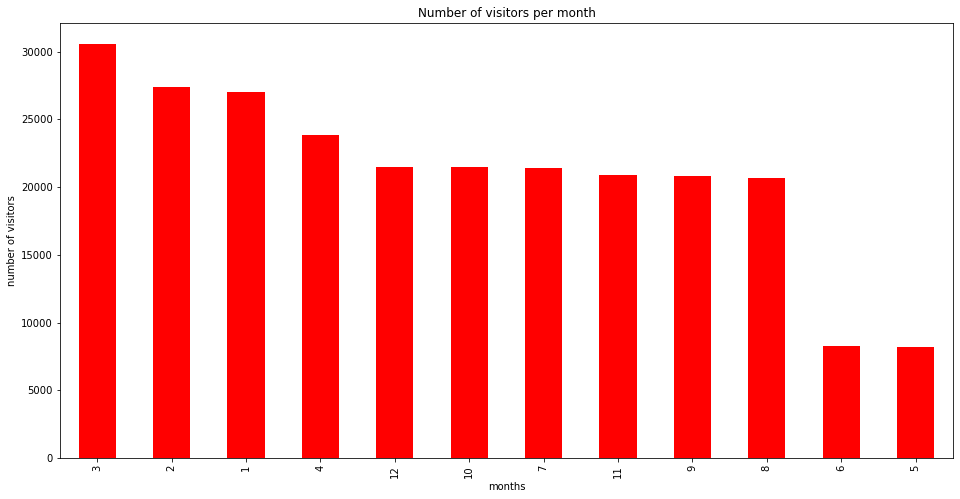

In [131]:
temp = pd.to_datetime(air_visit_data['visit_date'])
temp = temp.dt.month
temp.value_counts().plot(kind='bar',figsize=(16,8),color='r')
plt.ylabel("number of visitors")
plt.xlabel("months")
plt.title("Number of visitors per month")
plt.show()

>**Observations**
>1. March month has highest count of visitors. This is the busiest month for air restaurants.
>2. May and June have the lowest crowd.

### 5.2 Air Reserve

In [151]:
air_reserve = pd.read_csv('air_reserve.csv')
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['reserve_datetime'] = pd.to_datetime(air_reserve['reserve_datetime'])
air_reserve['visit_hour'] = air_reserve['visit_datetime'].dt.hour
air_reserve['visit_date'] = air_reserve['visit_datetime'].dt.date
air_reserve['visit_month'] = air_reserve['visit_datetime'].dt.month
air_reserve['reserve_hour'] = air_reserve['reserve_datetime'].dt.hour
air_reserve['reserve_date'] = air_reserve['reserve_datetime'].dt.date
air_reserve['reserve_month'] = air_reserve['reserve_datetime'].dt.month
air_reserve['time_difference'] = air_reserve['visit_datetime'].dt.date-air_reserve['reserve_datetime'].dt.date
air_reserve.tail(5)

air_store_id      visit_datetime    reserve_datetime  \
92373  air_db4b38ebe7a7ceff 2017-05-29 18:00:00 2017-04-17 19:00:00   
92374  air_1033310359ceeac1 2017-05-30 23:00:00 2017-04-19 17:00:00   
92375  air_877f79706adbfb06 2017-05-31 20:00:00 2017-04-12 23:00:00   
92376  air_900d755ebd2f7bbd 2017-05-31 20:00:00 2017-04-19 16:00:00   
92377  air_3cad29d1a23209d2 2017-05-31 21:00:00 2017-04-22 10:00:00   

       reserve_visitors  visit_hour  visit_date  visit_month  reserve_hour  \
92373                 6          18  2017-05-29            5            19   
92374                 8          23  2017-05-30            5            17   
92375                 3          20  2017-05-31            5            23   
92376                10          20  2017-05-31            5            16   
92377                 3          21  2017-05-31            5            10   

      reserve_date  reserve_month time_difference  
92373   2017-04-17              4         42 days  
92374   2017-04-19              4         41 days  
92375   2017-04-12              4         49 days  
92376   2017-04-19              4         42 days  
92377   2017-04-22              4         39 days

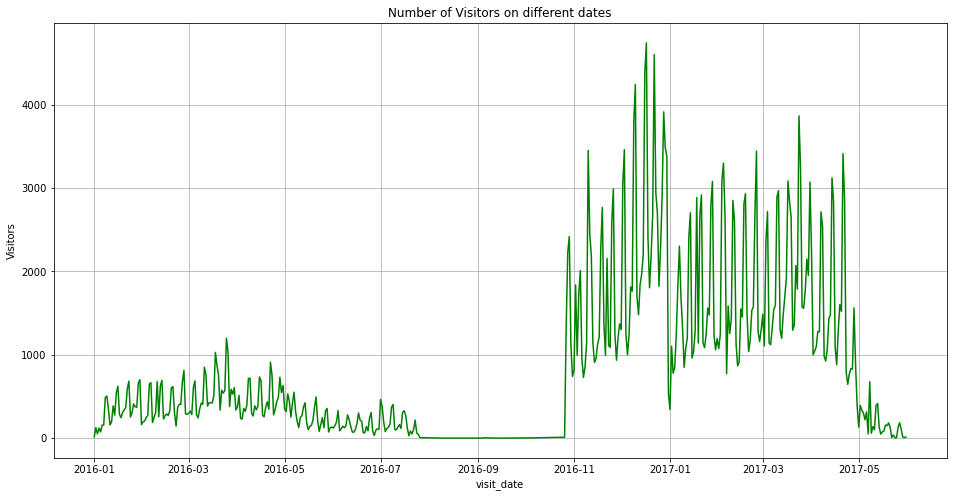

In [159]:
fig,ax = plt.subplots(1,1,figsize=(16,8))
temp_data = air_reserve.groupby(['visit_date'])['reserve_visitors'].sum()
temp_data.plot(grid="True",ax=ax,color='g')
plt.ylabel("Visitors")
plt.title('Number of Visitors on different dates')
plt.show()

>.**Observations**
>1. There is significant increase in the number of reservations made in air system from the month of november. The numbers sometimes got doubled and quadrupled in the following months.
>2. There is flat line from july end of 2016 to october end of 2016. This period registered the lowest number of reservations. 

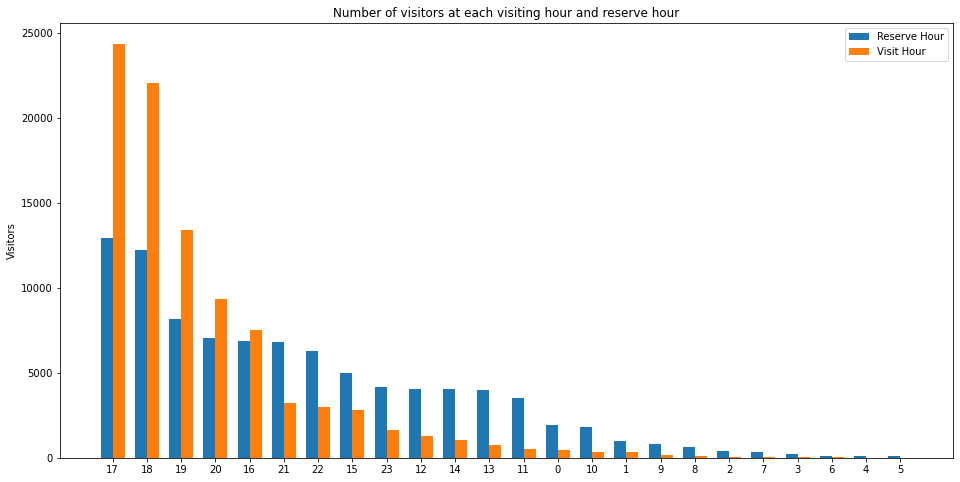

In [206]:
#bargraph of visiting hours
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

temp1 = air_reserve['reserve_hour'].value_counts()
temp2 = air_reserve['visit_hour'].value_counts()
x = np.arange(len(temp1.index))
fig, ax = plt.subplots(figsize=(16,8))
width = 0.35
rects1 = ax.bar(x - width/2,temp1.values, width, label='Reserve Hour')
rects2 = ax.bar(x + width/2,temp2.values, width, label='Visit Hour')
ax.set_ylabel('Visitors')
ax.set_title('Number of visitors at each visiting hour and reserve hour')
ax.set_xticks(x)
ax.set_xticklabels(temp1.index)
ax.legend()
plt.show()

>**Observations**
>1. The numbers of customers are high during evening time between 5 PM to 8PM for both reservation and visiting time.
>2. Very less number of customers do come for breakfast as there is less frequency between 7 AM to 10AM

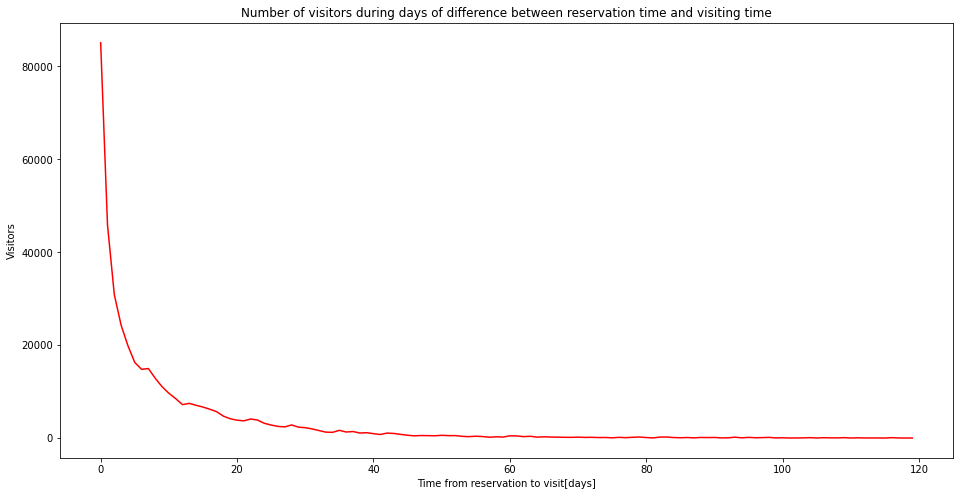

In [297]:
temp = air_reserve.groupby(['time_difference'])['reserve_visitors'].sum()
temp = temp[temp.index<pd.Timedelta(120,'D')]
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(temp.index.days,temp.values,figure=fig,color='r')
plt.xlabel("Time from reservation to visit[days]")
plt.ylabel("Visitors")
plt.title("Number of visitors during days of difference between reservation time and visiting time")
plt.show()
# temp = temp.groupby(['time_difference'])['reserve_visitors'].sum()
# temp.plot()

>**Observations**
>1. This graph somewhat follows a powerlaw distribution. For the initial days of difference, the numbers are very high, but they start dropping exponentially till 20 days.
>2. We can witness that most of people don't want much wait for their dining time.
>3. Long term reservations are almost negligible in the japan.

### 5.3 Hpg Reserve

In [300]:
hpg_reserve = pd.read_csv('hpg_reserve.csv')
hpg_reserve['visit_datetime'] = pd.to_datetime(hpg_reserve['visit_datetime'])
hpg_reserve['reserve_datetime'] = pd.to_datetime(hpg_reserve['reserve_datetime'])
hpg_reserve['visit_hour'] = hpg_reserve['visit_datetime'].dt.hour
hpg_reserve['visit_date'] = hpg_reserve['visit_datetime'].dt.date
hpg_reserve['visit_month'] = hpg_reserve['visit_datetime'].dt.month
hpg_reserve['reserve_hour'] = hpg_reserve['reserve_datetime'].dt.hour
hpg_reserve['reserve_date'] = hpg_reserve['reserve_datetime'].dt.date
hpg_reserve['reserve_month'] = hpg_reserve['reserve_datetime'].dt.month
hpg_reserve['time_difference'] = hpg_reserve['visit_datetime'].dt.date-hpg_reserve['reserve_datetime'].dt.date
hpg_reserve.tail(5)

hpg_store_id      visit_datetime    reserve_datetime  \
2000315  hpg_2b293477ea4642fb 2017-05-31 20:00:00 2017-04-19 07:00:00   
2000316  hpg_f922aeca48ca5a29 2017-05-31 20:00:00 2017-03-19 00:00:00   
2000317  hpg_e9151de687b93aa3 2017-05-31 21:00:00 2017-04-14 20:00:00   
2000318  hpg_fae6c96189b4a122 2017-05-31 21:00:00 2017-04-19 17:00:00   
2000319  hpg_0b70de808b55ad1e 2017-05-31 23:00:00 2017-04-21 13:00:00   

         reserve_visitors  visit_hour  visit_date  visit_month  reserve_hour  \
2000315                 2          20  2017-05-31            5             7   
2000316                 3          20  2017-05-31            5             0   
2000317                49          21  2017-05-31            5            20   
2000318                 9          21  2017-05-31            5            17   
2000319                 6          23  2017-05-31            5            13   

        reserve_date  reserve_month time_difference  
2000315   2017-04-19              4         42 days  
2000316   2017-03-19              3         73 days  
2000317   2017-04-14              4         47 days  
2000318   2017-04-19              4         42 days  
2000319   2017-04-21              4         40 days

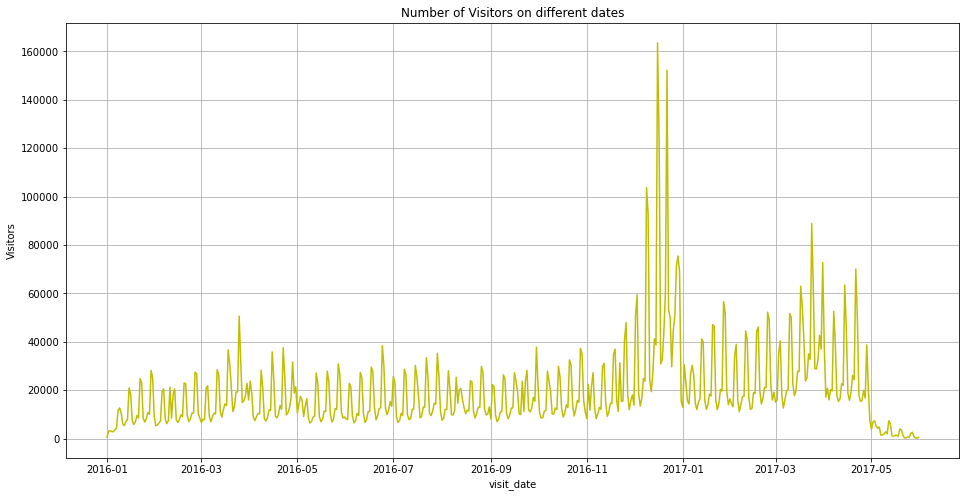

In [302]:
fig,ax = plt.subplots(1,1,figsize=(16,8))
temp_data = hpg_reserve.groupby(['visit_date'])['reserve_visitors'].sum()
temp_data.plot(grid="True",ax=ax,color='y')
plt.ylabel("Visitors")
plt.title('Number of Visitors on different dates')
plt.show()

>**Observations**
>1. There is a weekly pattern in the above time series graph. This up and down may be due to weekdays and weekend.
>2. There is sudden increase in the number of hpg reservations during last days of December 2016.
>3. Here , we can see that is there is dip on the 1st january of 2016 and 1st january of 2017 due to new year

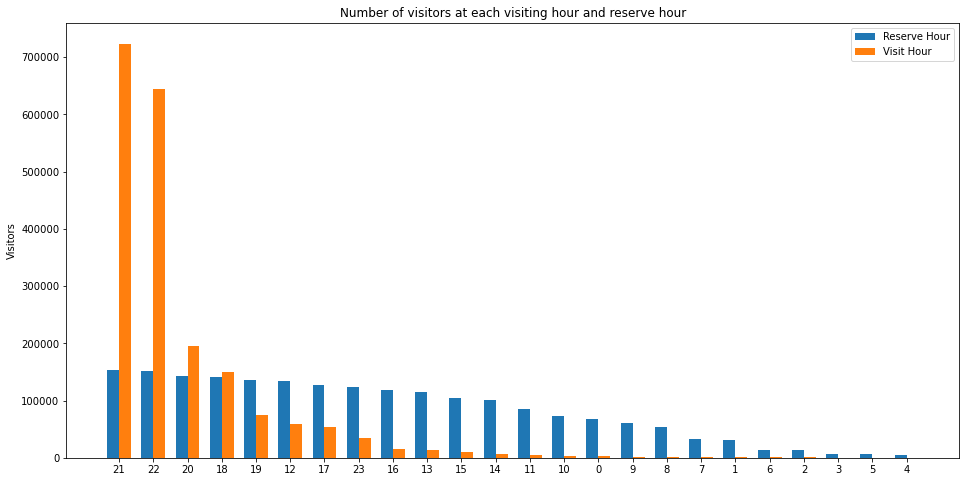

In [303]:
#bargraph of visiting and reserve hours
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

temp1 = hpg_reserve['reserve_hour'].value_counts()
temp2 = hpg_reserve['visit_hour'].value_counts()
x = np.arange(len(temp1.index))
fig, ax = plt.subplots(figsize=(16,8))
width = 0.35
rects1 = ax.bar(x - width/2,temp1.values, width, label='Reserve Hour')
rects2 = ax.bar(x + width/2,temp2.values, width, label='Visit Hour')
ax.set_ylabel('Visitors')
ax.set_title('Number of visitors at each visiting hour and reserve hour')
ax.set_xticks(x)
ax.set_xticklabels(temp1.index)
ax.legend()
plt.show()

>**Observations**
>1. The behaviour of visitors is same for hpg restaurants as well like air restaurants.
>2. People prefer mostly evening time for eating and least preference for breakfasts.

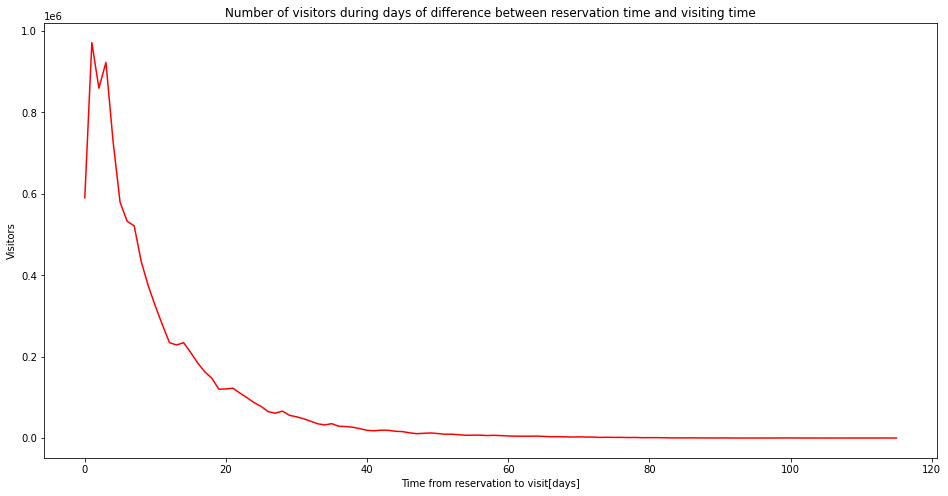

In [304]:
temp = hpg_reserve.groupby(['time_difference'])['reserve_visitors'].sum()
temp = temp[temp.index<pd.Timedelta(120,'D')]
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(temp.index.days,temp.values,figure=fig,color='r')
plt.xlabel("Time from reservation to visit[days]")
plt.ylabel("Visitors")
plt.title("Number of visitors during days of difference between reservation time and visiting time")
plt.show()

>**Observations**
>1. For the first initial days, there is a zig zag in the behaviour. But after 6 that it starts as if it is following power law distribution.
>2. Like air restaurants, hpg restaurants also see that there is less waiting time between reservation and visting.

### 5.4 Air Store

In [308]:
air_store_info = pd.read_csv('air_store_info.csv')
air_store_info.head(5)

air_store_id  air_genre_name                 air_area_name  \
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen   

    latitude   longitude  
0  34.695124  135.197852  
1  34.695124  135.197852  
2  34.695124  135.197852  
3  34.695124  135.197852  
4  35.658068  139.751599

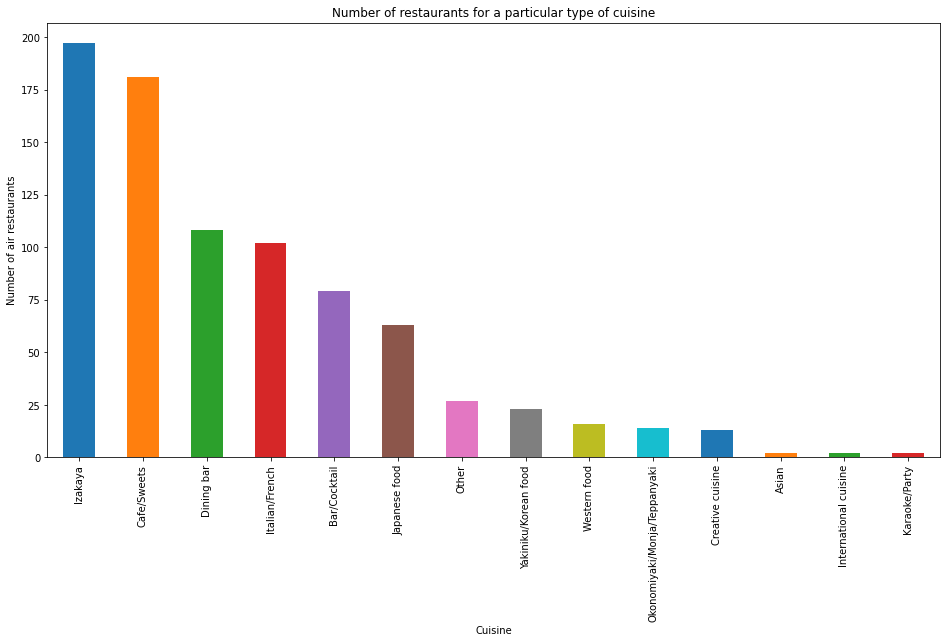

In [324]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
air_store_info['air_genre_name'].value_counts().plot(kind='bar',figsize=(16,8),color=colors)
plt.xlabel("Cuisine")
plt.ylabel("Number of air restaurants")
plt.title("Number of restaurants for a particular type of cuisine")
plt.show()

>**Observations**
>1. We can see that the most popular cuisines in the air restaurants are Izakaya,Cafe/Sweets and Dining Bar
>2. International cuisine,karaoke/Party and Asian are the least preferred cuisines

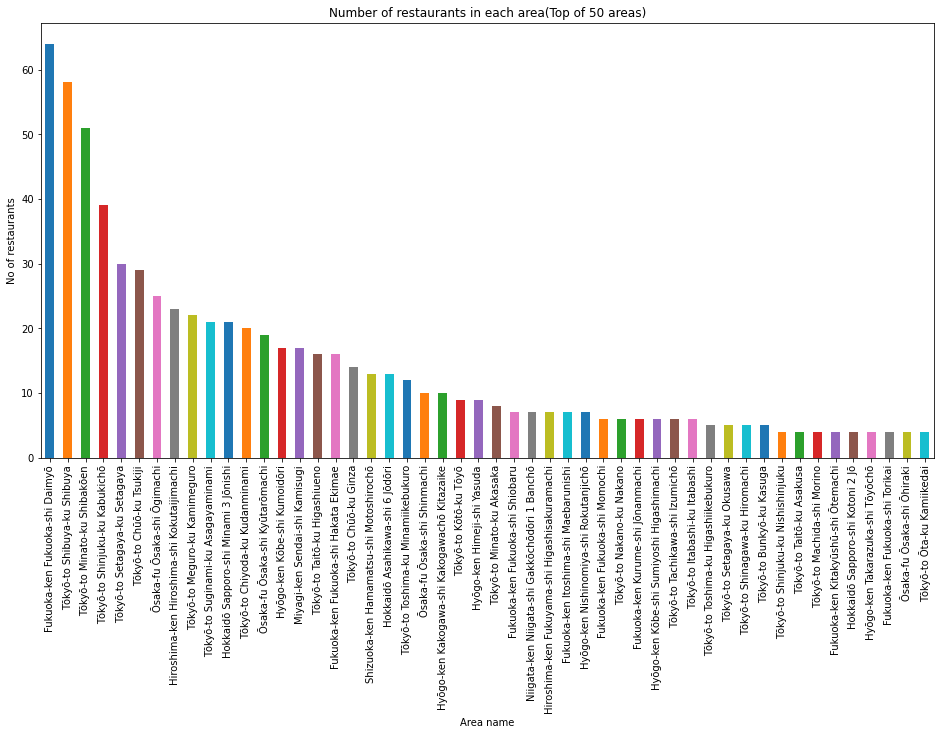

In [333]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
air_store_info['air_area_name'].value_counts()[:50].plot(kind='bar',figsize=(16,8),color=colors)
plt.xlabel("Area name")
plt.ylabel("No of restaurants")
plt.title("Number of restaurants in each area(Top of 50 areas)")
plt.show()

>**Observations**
>1. Fukuoka has the largest number of air restaurants per area, followed by many Tokyo areas
>2. Except for top 20 areas, rest of the areas have 10 or below restaurants per area

### 5.5 Hpg Store

In [340]:
hpg_store_info = pd.read_csv('hpg_store_info.csv')
hpg_store_info.head(5)

829


hpg_store_id  hpg_genre_name                  hpg_area_name  \
0  hpg_6622b62385aec8bf  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
1  hpg_e9e068dd49c5fa00  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
2  hpg_2976f7acb4b3a3bc  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
3  hpg_e51a522e098f024c  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
4  hpg_e3d0e1519894f275  Japanese style  Tōkyō-to Setagaya-ku Taishidō   

    latitude   longitude  
0  35.643675  139.668221  
1  35.643675  139.668221  
2  35.643675  139.668221  
3  35.643675  139.668221  
4  35.643675  139.668221

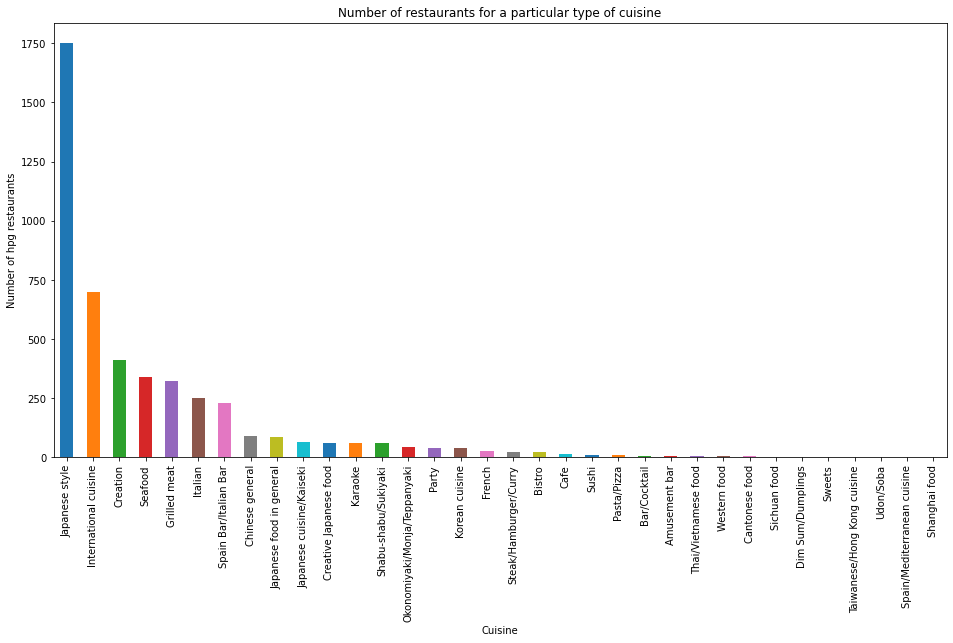

In [331]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
hpg_store_info['hpg_genre_name'].value_counts().plot(kind='bar',figsize=(16,8),color=colors)
plt.xlabel("Cuisine")
plt.ylabel("Number of hpg restaurants")
plt.title("Number of restaurants for a particular type of cuisine")
plt.show()

>**Observations**
>1. Here international cuisine is second highest for hpg restaurants while it was in the lowest range for air restaurants.
>2. Japanese style is the most popular type of cuisine. This may be due to japanese cultured food.
>3. The hpg have more varieties of cuisine than air.

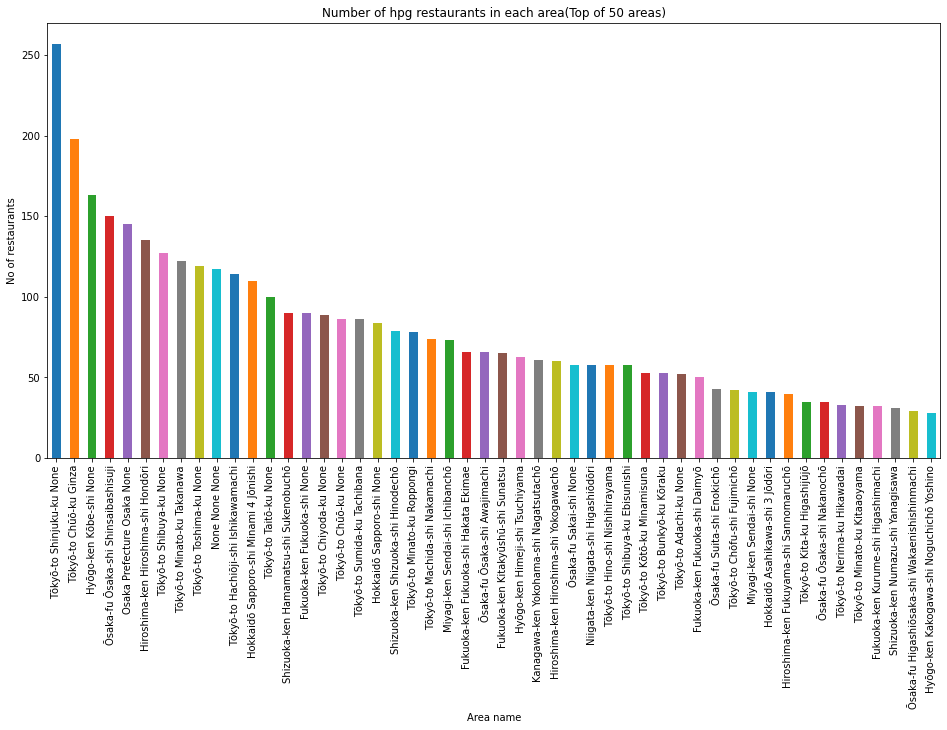

In [336]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
hpg_store_info['hpg_area_name'].value_counts()[:50].plot(kind='bar',figsize=(16,8),color=colors)
plt.xlabel("Area name")
plt.ylabel("No of restaurants")
plt.title("Number of hpg restaurants in each area(Top of 50 areas)")
plt.show()

>**Observations**
>1. Tokyo and Osaka are prominently present in the top 50 restaurants per area.
>2. There are more hpg restaurants than air restaurants in japan.

### 5.6 Holidays

In [341]:
date_info = pd.read_csv("date_info.csv")
date_info.head(5)

calendar_date day_of_week  holiday_flg
0    2016-01-01      Friday            1
1    2016-01-02    Saturday            1
2    2016-01-03      Sunday            1
3    2016-01-04      Monday            0
4    2016-01-05     Tuesday            0

There are 482 non-holiday days and 35 holiday days for 2016 and 2017


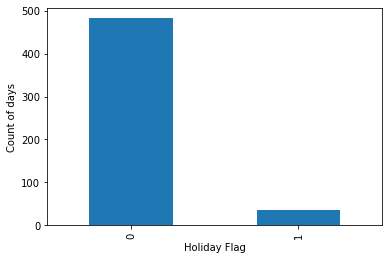

In [354]:
temp = date_info['holiday_flg'].value_counts()
print("There are {0} non-holiday days and {1} holiday days for 2016 and 2017".format(temp[0],temp[1]))
date_info['holiday_flg'].value_counts().plot(kind='bar')
plt.xlabel("Holiday Flag")
plt.ylabel("Count of days")
plt.show()

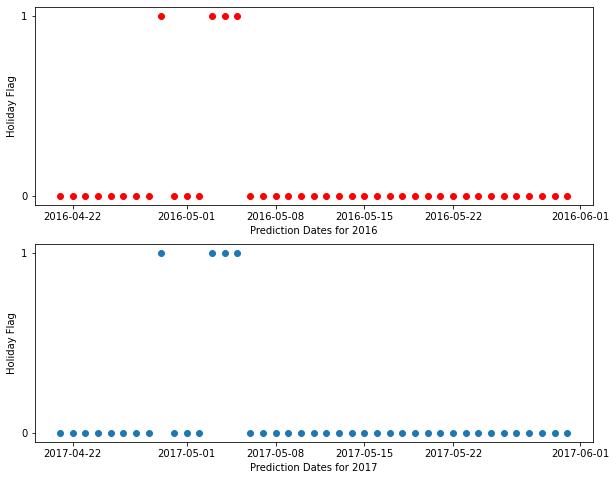

In [465]:
import matplotlib.ticker as plticker
date_info['calendar_date'] = pd.to_datetime(date_info['calendar_date'])
temp_2016 = date_info.loc[(date_info['calendar_date']>='21-04-2016') & (date_info['calendar_date']<='31-05-2016')][['calendar_date','holiday_flg']]
temp_2017 = date_info.loc[(date_info['calendar_date']>='21-04-2017') & (date_info['calendar_date']<='31-05-2017')][['calendar_date','holiday_flg']]
fig,ax = plt.subplots((2),figsize=(10,8))
ax[0].scatter(x=temp_2016['calendar_date'],y=temp_2016['holiday_flg'],color='r')
ax[1].scatter(x=temp_2017['calendar_date'],y=temp_2017['holiday_flg'])
ax[0].set_xlabel("Prediction Dates for 2016")
ax[1].set_xlabel("Prediction Dates for 2017")
ax[0].set_ylabel("Holiday Flag")
ax[1].set_ylabel("Holiday Flag")
ax[0].set_yticks(range(0,2))
ax[1].set_yticks(range(0,2))
plt.show()

>**Observations**
>1. For the prediction duration, the holidays are falling on the same day for 2016 and 2017.
>2. There are around 6.7% holidays in our data

## 6. Bivariate Analysis

### 6.1 Visitors per Genres

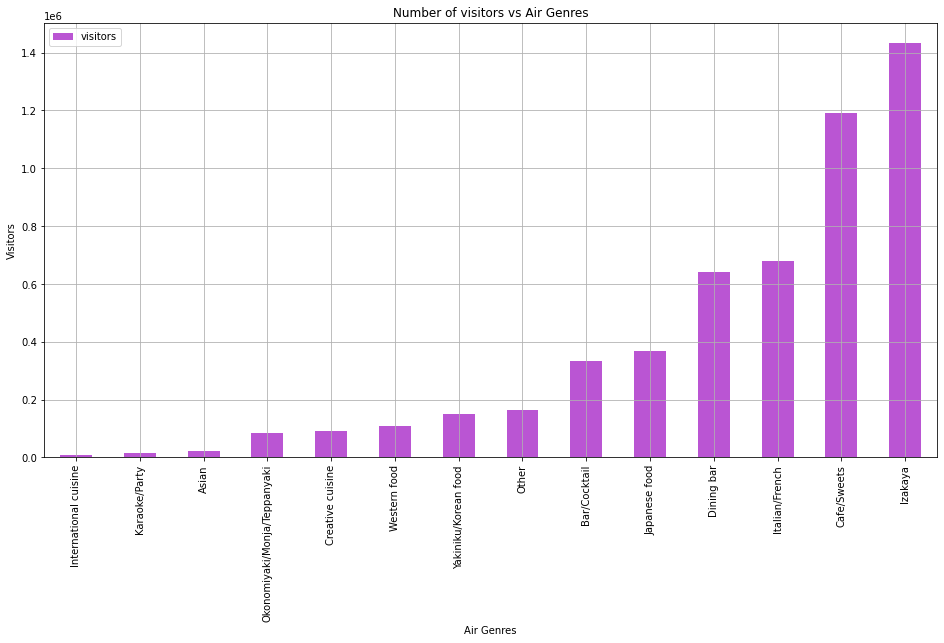

In [2]:
air_visit_data = pd.read_csv('air_visit_data.csv')
air_store_info = pd.read_csv('air_store_info.csv')
temp_data = pd.merge(air_store_info,air_visit_data,how='left',on=['air_store_id']) #merging the air_visit_data and air_store_info
temp_data = temp_data.groupby(['air_genre_name'])['visitors'].sum().to_frame()
temp_data.sort_values(by='visitors',inplace=True)
temp_data.plot(kind='bar',color='mediumorchid',grid=True,figsize=(16,8))
plt.xlabel("Air Genres")
plt.ylabel("Visitors")
plt.title("Number of visitors vs Air Genres")
plt.show()

>**Observation**
>1. There are total 14 types of genres for air restaurants.
>2. Izakaya and Cafe/Sweets are the most popular genres for visitors.
>3. International Cuisine, Karaoke/Party and Asian Food are the least preferred choices by visitors

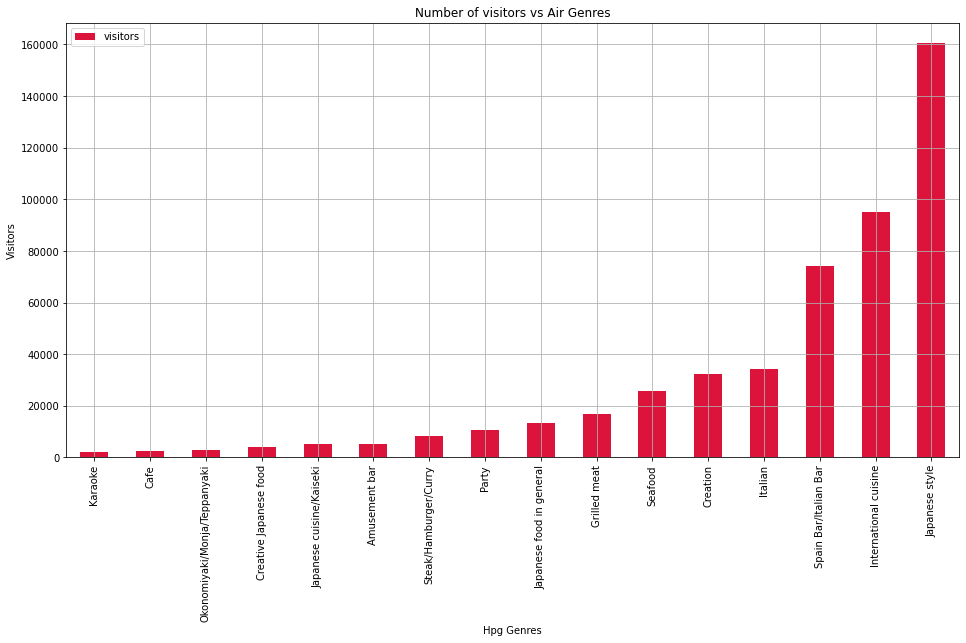

In [47]:
temp_data = pd.merge(hpg_store_info,store_id_relation,how='inner',on=['hpg_store_id'])
temp_data = pd.merge(air_visit_data,temp_data,how='inner',on=['air_store_id'])
temp_data = temp_data.groupby(['hpg_genre_name'])['visitors'].sum().to_frame()
temp_data.sort_values(by='visitors',inplace=True)
temp_data.plot(kind='bar',color='crimson',grid=True,figsize=(16,8))

plt.xlabel("Hpg Genres")
plt.ylabel("Visitors")
plt.title("Number of visitors vs Air Genres")
plt.show()

>**Observations**
>1. The Japanese Style and International Cuisine are two most popular genres in hpg restaurants.
>2. We can note here not all the genres(34) of hpg restaurants are listed here.
>3. It is quite contrasting to witness that International Cuisine was the least preferred choice in air restaurants where as it is in top preferred choices of hpg restaurants.

### 6.2 Visitor and Reservations

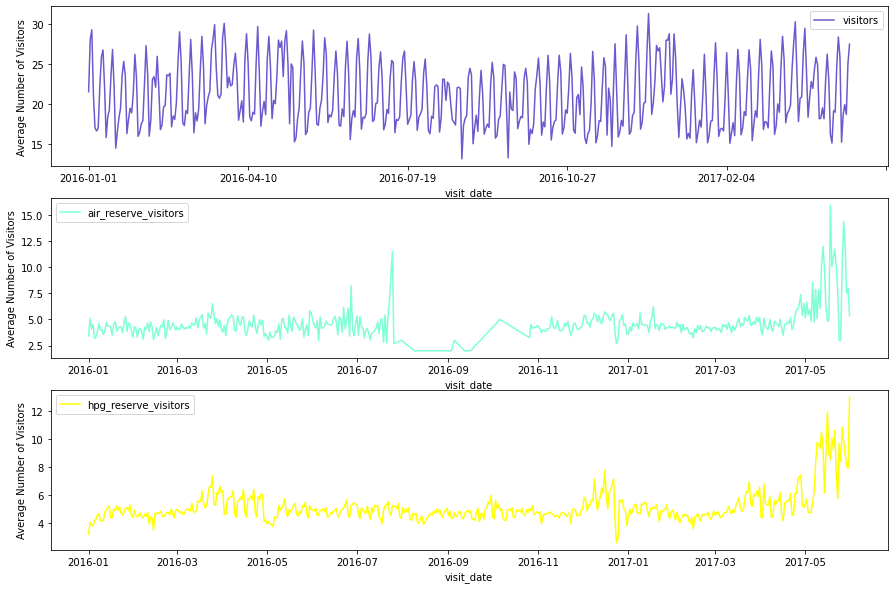

In [91]:
fig,axis = plt.subplots(3,figsize=(15,10))
air_visit_data = pd.read_csv('air_visit_data.csv')
air_reserve = pd.read_csv('air_reserve.csv')
hpg_reserve = pd.read_csv('hpg_reserve.csv')
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['visit_date'] = air_reserve['visit_datetime'].dt.date
hpg_reserve['visit_datetime'] = pd.to_datetime(hpg_reserve['visit_datetime'])
hpg_reserve['visit_date'] = hpg_reserve['visit_datetime'].dt.date

temp1 = air_visit_data.groupby(['visit_date'])['visitors'].mean().to_frame()
temp2 = air_reserve.groupby(['visit_date'])['reserve_visitors'].mean().to_frame()
temp3 = hpg_reserve.groupby(['visit_date'])['reserve_visitors'].mean().to_frame()
temp1.plot(color='slateblue',kind='line',ax=axis[0])
temp2.plot(color='aquamarine',kind='line',ax=axis[1])
temp3.plot(color='yellow', kind='line',ax=axis[2])
axis[0].set_ylabel("Average Number of Visitors")
axis[1].set_ylabel("Average Number of Visitors")
axis[2].set_ylabel("Average Number of Visitors")
axis[0].legend(['visitors'])
axis[1].legend(['air_reserve_visitors'])
axis[2].legend(['hpg_reserve_visitors'])
plt.show()

>**Observations**
>1. The average of non-registered visitors is higher than average of registered visitors on air and hpg restaurants.
>2. There are more number of reservations in air restaurants than hpg restaurants.
>3. There is a dip in 2016 and 2017 in the month of january due to new year eve

### 6.3 Number of Unique Stores

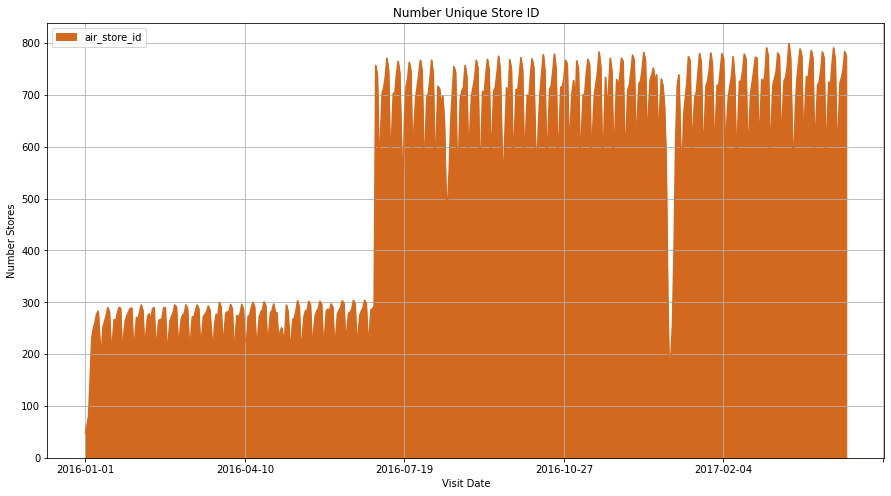

In [177]:
#https://www.kaggle.com/faizalabdkadir/recruit-visual-eda-itadakimasu
fig,axis = plt.subplots(1,1, figsize=(15,8))
stores= air_visit_data.groupby(['visit_date'])['air_store_id'].size()
stores.plot(kind='area',  color= 'chocolate', grid=True, ax=axis, legend=True)
plt.ylabel("Number Stores")
plt.xlabel("Visit Date")
plt.title("Number Unique Store ID")
plt.show()

>**Observations**
>1. Number of air stores increased by 150% in the mid of 2016.
>2. The cause behind the hike is inclusion of 500 restaurants to the air restaurant database in the mid of 2016

### 6.4 Impact of holidays

In [41]:
air_visit_data['calendar_date'] = air_visit_data['visit_date']
temp_df=air_visit_data.drop(['visit_date'],axis=1)

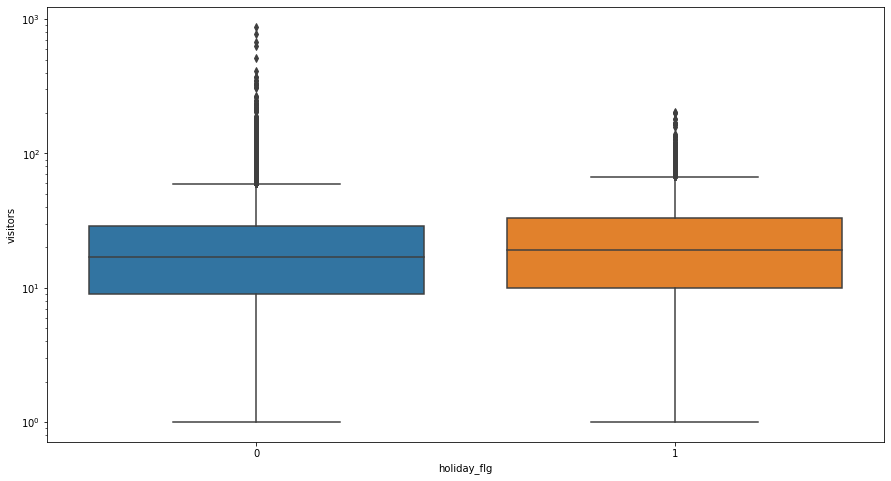

In [40]:
temp_df = pd.merge(temp_df,date_info,how='left',on=['calendar_date'])
temp_df = temp_df.drop(['air_store_id','day_of_week','calendar_date'],axis=1)
fig,axis = plt.subplots(1,1, figsize=(15,8))
sns.boxplot(x=temp_df['holiday_flg'],y=temp_df['visitors'],ax=axis)
plt.yscale('log')
plt.show()

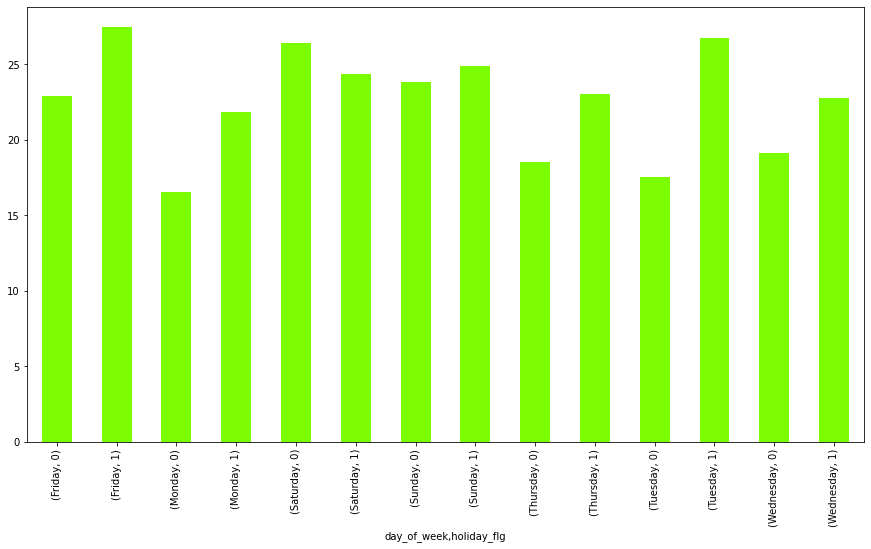

In [48]:
temp_df=air_visit_data.drop(['visit_date'],axis=1)
temp_df = pd.merge(temp_df,date_info,how='left',on=['calendar_date'])
x=temp_df.groupby(['day_of_week','holiday_flg'])['visitors'].mean()
fig,axis = plt.subplots(figsize=(15,8))
x.plot(kind='bar',ax=axis,color='lawngreen')

>**Observations**
>1. In totality, there is no impact of holidays on the average visitors number.
>2. For weekdays, the difference between holiday days and non-holidays is significant whereas for weekend, there is very slight difference between holidays and non-holidays.

### 6.5  Number of visitors vs Genre Name and Genre Area

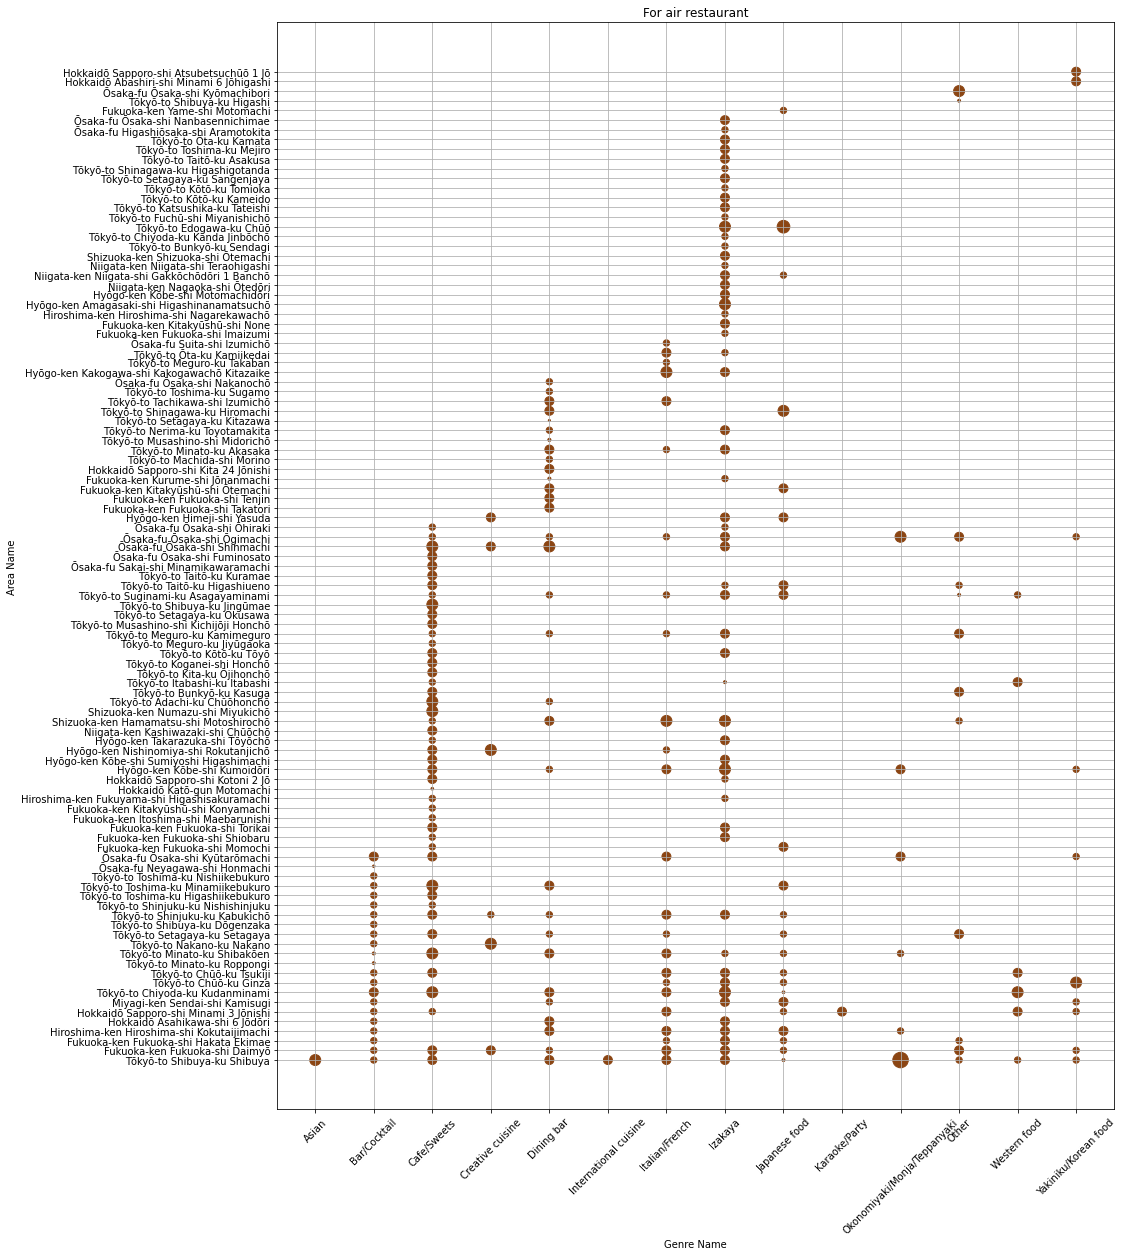

In [222]:
temp_df = pd.merge(air_store_info,air_visit_data,how='outer',on=['air_store_id'])
table=temp_df.groupby(['air_genre_name','air_area_name'],as_index=False).agg({'visitors':np.mean})
size = table['visitors'].to_numpy()
fig,axis = plt.subplots(figsize=(15,20))
s = []
for i in size:
    if i<10:
        s.append(i)
    else:
        s.append(i//10*40)
plt.scatter(x = table['air_genre_name'], y = table['air_area_name'],s=s,color='saddlebrown')
axis.grid(True)
plt.xticks(rotation=45)
plt.xlabel("Genre Name")
plt.ylabel("Area Name")
plt.title("For area restaurant")
plt.show()

>**Observations**
>1. Some areas have lots of restaurants and varieties, whereas others contain only a single type of cuisine restaurant.
>2. Some cuisines like 'Izakaya' and 'Cafe' are available almost in every area. 'Karaoke/Party' and 'Internation Cuisine' are only present in only one area of japan.

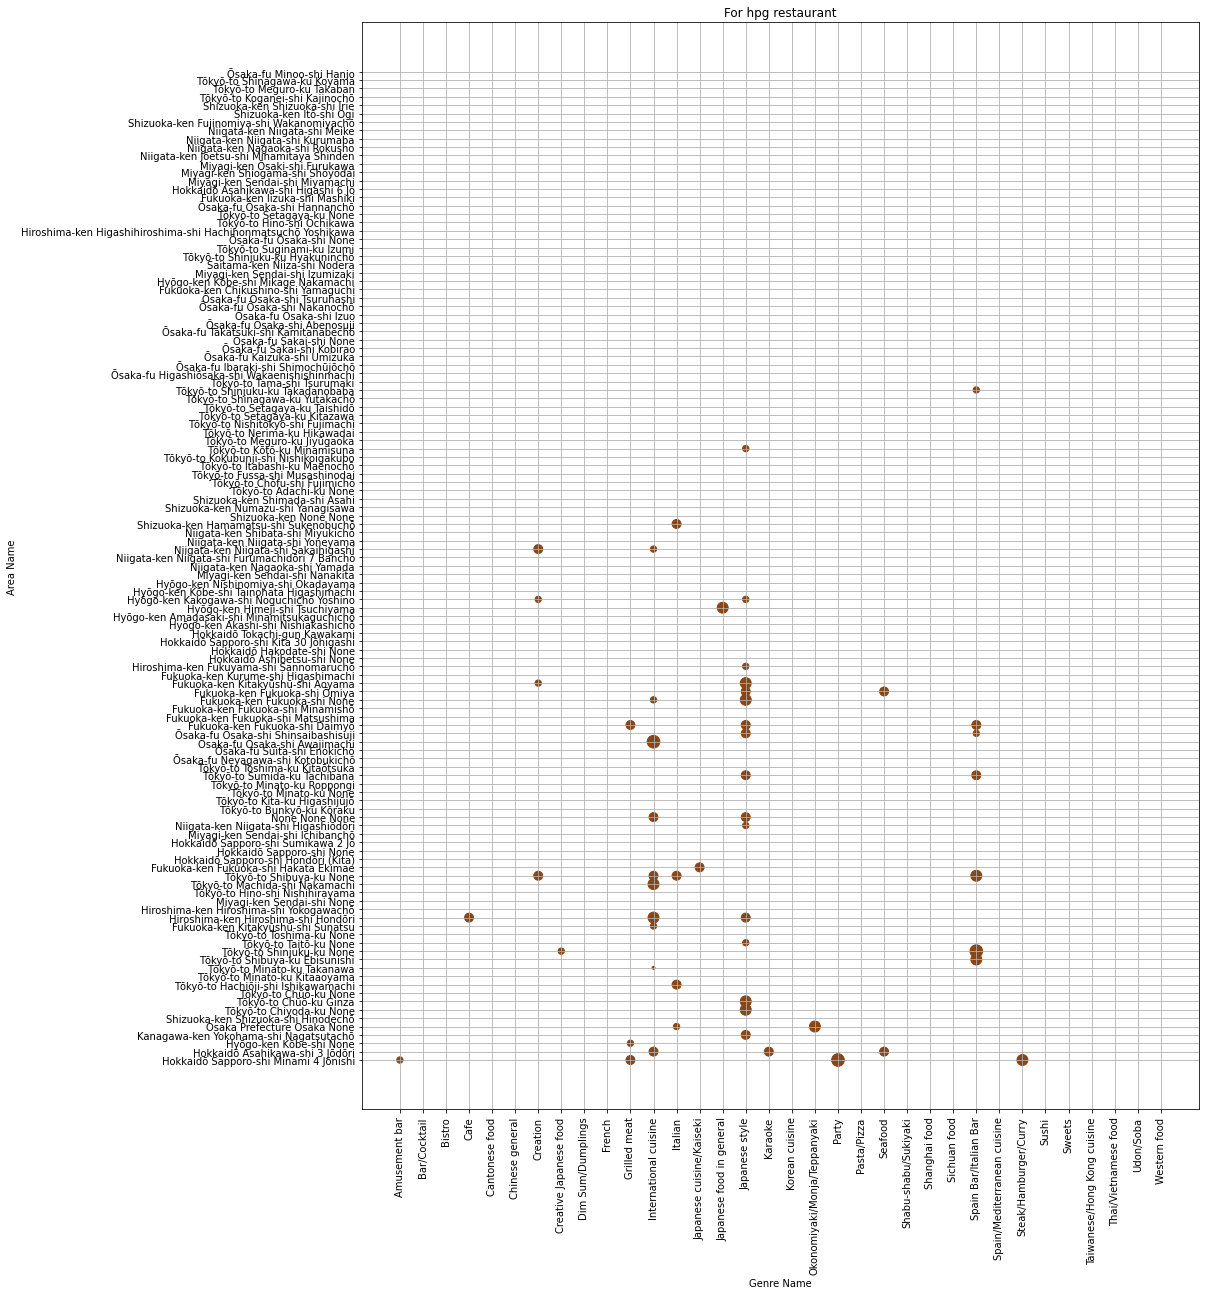

In [261]:
import math
temp_df = pd.merge(hpg_store_info,store_id_relation,how='outer',on=['hpg_store_id'])
temp_df = pd.merge(temp_df,air_visit_data,how='left',on=['air_store_id'])
table=temp_df.groupby(['hpg_genre_name','hpg_area_name'],as_index=False).agg({'visitors':np.mean})
size = table['visitors'].to_numpy()
fig,axis = plt.subplots(figsize=(15,20))
s = []
for i in size:
    if math.isnan(i):
        s.append(0)
    elif i<10:
        s.append(i)
    else:
        s.append(i//10*40)
plt.scatter(x = table['hpg_genre_name'], y = table['hpg_area_name'],s=s,color='saddlebrown')
axis.grid(True)
plt.xticks(rotation=90)
plt.xlabel("Genre Name")
plt.ylabel("Area Name")
plt.title("For hpg restaurant")
plt.show()

>**Observations**
>1.  Here in hpg restaurants, international cuisine is more popular than air restaurants.
>2. There are more number of genres types in hpg restaurants than air restaurants.
>3. Internation Cuisine and Japanese style are among top two in number of average visitors.

### 6.6 Days of the week & months of the year

In [25]:
import datetime as dt
import calendar
air_visit_data['visit_date'] = pd.to_datetime(air_visit_data['visit_date'])
air_visit_data['weekday'] = air_visit_data['visit_date'].apply(lambda x: dt.datetime.strftime(x, '%A'))
air_visit_data['month'] = air_visit_data['visit_date'].dt.month
air_visit_data['month'] = air_visit_data['month'].apply(lambda x: calendar.month_abbr[x])

Text(0.5, 1.0, 'Average Visitors Per Day Of Week')

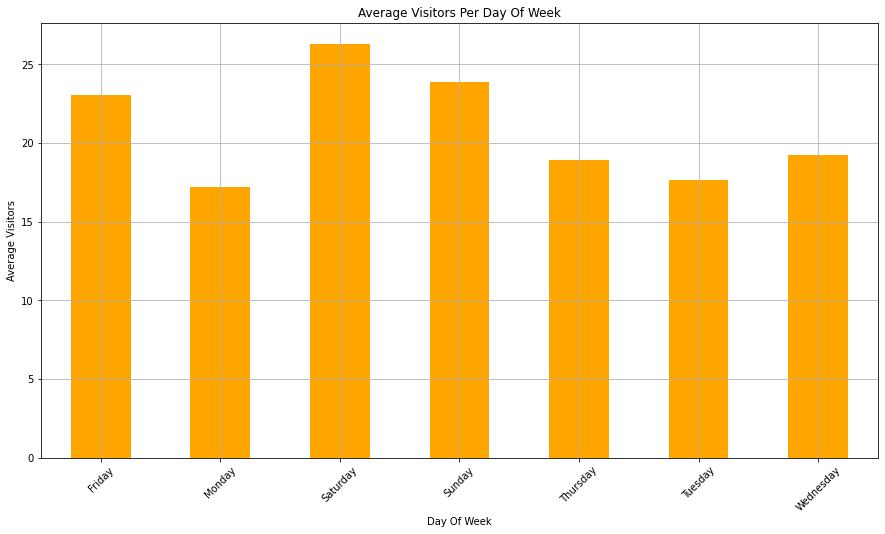

In [22]:
fig, axis=plt.subplots(1,1, figsize=(15,8))
temp= air_visit_data.groupby(['weekday'])['visitors'].mean().to_frame()
temp.plot(kind='bar',color='orange', grid=True, ax=axis, legend=False)
plt.xticks(rotation=45)
plt.xlabel('Day Of Week')
plt.ylabel('Average Visitors')
plt.title('Average Visitors Per Day Of Week')

>**Observations**
>1. Weekends have higher number of visitors as compared to weekdays.
>2. Monday has the lowest count of visitors
>3. Thursday and Wednesday have equal number of visitors

Text(0.5, 1.0, 'Average Visitors Per Month')

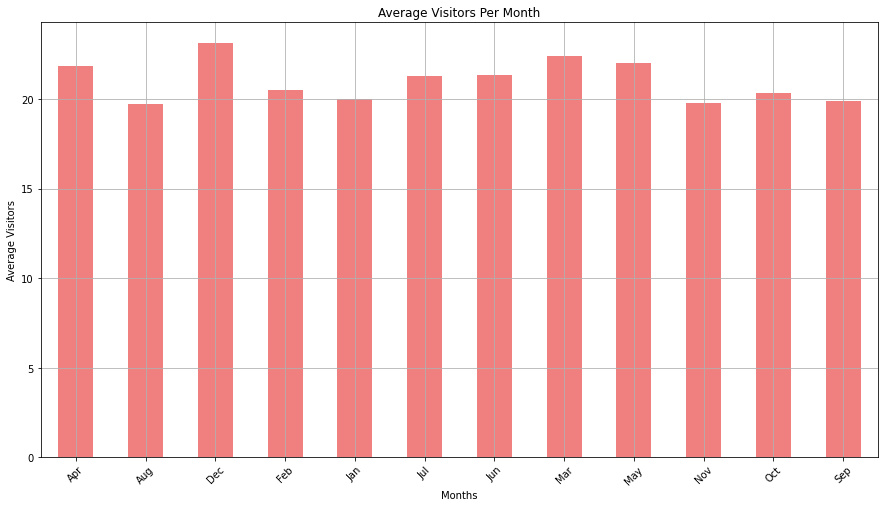

In [27]:
fig, axis=plt.subplots(1,1, figsize=(15,8))
temp= air_visit_data.groupby(['month'])['visitors'].mean().to_frame()
temp.plot(kind='bar',color='lightcoral', grid=True, ax=axis, legend=False)
plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('Average Visitors')
plt.title('Average Visitors Per Month')

>**Observations**
>1. December is the most occupied month of the year
>2. August and November have the least number of visitors
>3. After December, March has the highest number of visitors

### 7. GeoSpatial Analysis

In [73]:
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Air Restaurants</li>
    <li><span style='background:blue;opacity:0.7;'></span>Hpg Restaurants</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

In [74]:
import folium
air_restaurants_location = air_store_info[['air_area_name','latitude','longitude']]
hpg_restaurants_location = hpg_store_info[['hpg_area_name','latitude','longitude']]
air_restaurants_location.drop_duplicates(keep='first',inplace=True)
hpg_restaurants_location.drop_duplicates(keep='first',inplace=True)
base_location = folium.Map(width=1200,height=500,location=[34.6525,135.5063],zoom_start=6,tiles='Stamen Toner')
for i,j in air_restaurants_location.iterrows():
    if int(j['latitude']) != 0:
        folium.Marker(list((j['latitude'],j['longitude'])),popup=j['air_area_name'],icon=folium.Icon(color='red',prefix='fa',icon='anchor')).add_to(base_location)
for i,j in hpg_restaurants_location.iterrows():
    if int(j['latitude']) != 0:
        folium.Marker(list((j['latitude'],j['longitude'])),popup=j['hpg_area_name'],icon=folium.Icon(color='blue',prefix='fa',icon='angellist')).add_to(base_location)
base_location.get_root().add_child(macro)
base_location

## 8. Feature Engineering

In [2]:
import numpy as np
import pandas as pd

In [3]:
#reading all the csv files
air_reserve = pd.read_csv("air_reserve.csv")
hpg_reserve = pd.read_csv("hpg_reserve.csv")
air_store_info = pd.read_csv("air_store_info.csv")
hpg_store_info = pd.read_csv("hpg_store_info.csv")
store_id_relation = pd.read_csv("store_id_relation.csv")
air_visit_data = pd.read_csv("air_visit_data.csv")
sample_submission = pd.read_csv("sample_submission.csv")
date_info = pd.read_csv("date_info.csv")

In [54]:
#selecting train and test data
test_data = sample_submission.copy()
test_data['air_store_id'] = test_data['id'].apply(lambda x: str(x)[:-11])
test_data['visit_date'] = test_data['id'].apply(lambda x: str(x)[-10:])
test_data = test_data.drop(['id', 'visitors'], axis = 1)
train_data = air_visit_data.copy()

<h3> Merging Reservation history of hpg and air restaurants </h3>

In [55]:
#mergeing hpg and air restaurants history
hpg_reserve_history = store_id_relation.join(hpg_reserve.set_index('hpg_store_id'),on=['hpg_store_id'])
hpg_reserve_history = hpg_reserve_history.reset_index()
hpg_reserve_history = hpg_reserve_history.drop(['hpg_store_id','index'],axis=1)
reservation_history = pd.concat([air_reserve,hpg_reserve_history])
reservation_history.head(5)

air_store_id       visit_datetime     reserve_datetime  \
0  air_877f79706adbfb06  2016-01-01 19:00:00  2016-01-01 16:00:00   
1  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00   
2  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00   
3  air_877f79706adbfb06  2016-01-01 20:00:00  2016-01-01 16:00:00   
4  air_db80363d35f10926  2016-01-01 20:00:00  2016-01-01 01:00:00   

   reserve_visitors  
0                 1  
1                 3  
2                 6  
3                 2  
4                 5

In [56]:
#converting columns of reservation history into datetime format
reservation_history['visit_datetime'] = pd.to_datetime(reservation_history['visit_datetime'])
reservation_history['reserve_datetime'] = pd.to_datetime(reservation_history['reserve_datetime'])

## calculating the hour gap between visit time and reservation time
reservation_history['hour_gap'] = reservation_history['visit_datetime'].sub(reservation_history['reserve_datetime'])
reservation_history['hour_gap'] = reservation_history['hour_gap'].apply(lambda x: x/np.timedelta64(1,'h'))

#separating hour gap into 5 categories
reservation_history['reserve_12_h'] = np.where(reservation_history['hour_gap'] <= 12,
                                    reservation_history['reserve_visitors'], 0)
reservation_history['reserve_12_37_h'] = np.where((reservation_history['hour_gap'] <= 37) & (reservation_history['hour_gap'] > 12),
                                       reservation_history['reserve_visitors'], 0)
reservation_history['reserve_37_59_h'] = np.where((reservation_history['hour_gap'] <= 59) & (reservation_history['hour_gap'] > 37),
                                       reservation_history['reserve_visitors'], 0)
reservation_history['reserve_59_85_h'] = np.where((reservation_history['hour_gap'] <= 85) & (reservation_history['hour_gap'] > 59),
                                       reservation_history['reserve_visitors'], 0)
reservation_history['reserve_85_h'] = np.where((reservation_history['hour_gap'] > 85),
                                     reservation_history['reserve_visitors'], 0)

#finding difference between visit_datetime and reserve_datetime in days
reservation_history['visit_datetime'] = reservation_history['visit_datetime'].dt.date
reservation_history['reserve_datetime'] = reservation_history['reserve_datetime'].dt.date
reservation_history['time_diff_in_days'] = reservation_history.apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days,
    axis=1
)

In [57]:
reservation_history=reservation_history.rename(columns={'visit_datetime':'visit_date'})

In [58]:
#creating two columns early reservation and late reservation
reservation_history['early_reservation'] = reservation_history['time_diff_in_days'] <= 2
reservation_history['late_reservation'] = reservation_history['time_diff_in_days'] > 2

#sum early reservations
temp1 = reservation_history[reservation_history['early_reservation']].groupby(
    ['air_store_id','visit_date'], as_index=False
)[['time_diff_in_days', 'reserve_visitors']]
temp1 = temp1.sum()
temp1 = temp1.rename(columns={
    'time_diff_in_days': 'sum_time_diff_e',
    'reserve_visitors':'sum_visitors_e'
})

#avg early reservations
temp2 = reservation_history[reservation_history['early_reservation']].groupby(
    ['air_store_id','visit_date'], as_index=False
)[['time_diff_in_days', 'reserve_visitors']]
temp2 = temp2.mean()
temp2 = temp2.rename(columns={
    'time_diff_in_days': 'avg_time_diff_e',
    'reserve_visitors':'avg_visitors_e'
})

#sum late reservations
temp3 = reservation_history[reservation_history['late_reservation']].groupby(
    ['air_store_id','visit_date'], as_index=False
)[['time_diff_in_days', 'reserve_visitors']]
temp3 = temp3.sum()
temp3 = temp3.rename(columns={
    'time_diff_in_days': 'sum_time_diff_l',
    'reserve_visitors':'sum_visitors_l'
})

#avg late reservations
temp4 = reservation_history[reservation_history['late_reservation']].groupby(
    ['air_store_id','visit_date'], as_index=False
)[['time_diff_in_days', 'reserve_visitors']]
temp4 = temp4.sum()
temp4 = temp4.rename(columns={
    'time_diff_in_days': 'avg_time_diff_l',
    'reserve_visitors':'avg_visitors_l'
})

temp5 = pd.merge(temp1, temp2, how='inner', on=['air_store_id','visit_date'])
temp5 = pd.merge(temp5,temp3,how='outer',on=['air_store_id','visit_date'])
temp5 = pd.merge(temp5,temp4,how='outer',on=['air_store_id','visit_date'])
reservation_history_1 = temp5
reservation_history_1.head(5)

air_store_id  visit_date  sum_time_diff_e  sum_visitors_e  \
0  air_00a91d42b08b08d9  2016-03-08              2.0             3.0   
1  air_00a91d42b08b08d9  2016-04-07              1.0             2.0   
2  air_00a91d42b08b08d9  2016-04-09              4.0             4.0   
3  air_00a91d42b08b08d9  2016-04-22              1.0             2.0   
4  air_00a91d42b08b08d9  2016-04-28              1.0             2.0   

   avg_time_diff_e  avg_visitors_e  sum_time_diff_l  sum_visitors_l  \
0              2.0             3.0              NaN             NaN   
1              1.0             2.0              NaN             NaN   
2              2.0             2.0              NaN             NaN   
3              1.0             2.0              NaN             NaN   
4              1.0             2.0              NaN             NaN   

   avg_time_diff_l  avg_visitors_l  
0              NaN             NaN  
1              NaN             NaN  
2              NaN             NaN  
3              NaN             NaN  
4              NaN             NaN

In [59]:
#calculating the sum of different categories of hour gap
group_list = ['air_store_id', 'visit_date', 'reserve_visitors', 'reserve_12_h',
              'reserve_12_37_h', 'reserve_37_59_h', 'reserve_59_85_h', 'reserve_85_h']
temp6 = reservation_history[group_list].groupby(['air_store_id', 'visit_date'], as_index = False).sum()
reservation_history_2= temp6
reservation_history_2.head(5)

air_store_id  visit_date  reserve_visitors  reserve_12_h  \
0  air_00a91d42b08b08d9  2016-01-14                 2             0   
1  air_00a91d42b08b08d9  2016-01-15                 4             0   
2  air_00a91d42b08b08d9  2016-01-16                 2             0   
3  air_00a91d42b08b08d9  2016-01-22                 2             0   
4  air_00a91d42b08b08d9  2016-01-29                 5             0   

   reserve_12_37_h  reserve_37_59_h  reserve_59_85_h  reserve_85_h  
0                0                0                2             0  
1                0                0                0             4  
2                0                0                2             0  
3                0                0                2             0  
4                0                0                0             5

### Creating Features from Air Restaurants Information

In [60]:
#counting no of restaurants per genre of air_restaurants
restaurant_genre = air_store_info[['air_store_id','air_genre_name']].groupby(['air_genre_name'],as_index=False).count()
restaurant_genre = restaurant_genre.rename(columns={'air_store_id':'total_r_per_genre'})

#counting no of restaurants per area
restaurant_area =  air_store_info[['air_store_id','air_area_name']].groupby(['air_area_name'],as_index=False).count()
restaurant_area = restaurant_area.rename(columns={'air_store_id':'total_r_per_area'})

#adding latitude and longitude of area together
lat_long = air_store_info[['air_store_id','latitude','longitude']]
lat_long['total_lat_long'] = lat_long['latitude'] + lat_long['longitude']
#subtracting longitudes from maximum longitude
lat_long['diff_max_long'] = lat_long['longitude'].max()-lat_long['longitude']
#subtracting latitudes from maximum latitude
lat_long['diff_max_lat'] = lat_long['latitude'].max()-lat_long['latitude']
lat_long = lat_long.drop(columns=['latitude','longitude'])

temp1 = pd.merge(air_store_info,restaurant_genre,how='left',on=['air_genre_name'])
temp2 = pd.merge(temp1,restaurant_area,how='left',on=['air_area_name'])
temp3 = pd.merge(temp2,lat_long,how='left',on=['air_store_id'])
final_restaurant_table = temp3.drop(columns=['air_area_name','air_genre_name','latitude','longitude'])
final_restaurant_table.head(5)

<ipython-input-60-383813972a29>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_long['total_lat_long'] = lat_long['latitude'] + lat_long['longitude']


air_store_id  total_r_per_genre  total_r_per_area  total_lat_long  \
0  air_0f0cdeee6c9bf3d7                102                17      169.892977   
1  air_7cc17a324ae5c7dc                102                17      169.892977   
2  air_fee8dcf4d619598e                102                17      169.892977   
3  air_a17f0778617c76e2                102                17      169.892977   
4  air_83db5aff8f50478e                102                51      175.409667   

   diff_max_long  diff_max_lat  
0       9.075546      9.325508  
1       9.075546      9.325508  
2       9.075546      9.325508  
3       9.075546      9.325508  
4       4.521799      8.362564

### Visitor statistics based on non_working days

In [61]:
holiday_table = date_info.copy()
holiday_table['non_working_day'] = np.where(holiday_table['day_of_week'].isin(['Saturday', 'Sunday']) |
                                        holiday_table['holiday_flg'] == 1,1,0)
holiday_table = holiday_table.rename(columns={'calendar_date':'visit_date'})
holiday_table = holiday_table.drop(columns=['holiday_flg'])
holiday_table.head(5)

visit_date day_of_week  non_working_day
0  2016-01-01      Friday                1
1  2016-01-02    Saturday                1
2  2016-01-03      Sunday                1
3  2016-01-04      Monday                0
4  2016-01-05     Tuesday                0

In [62]:
#merging air_visit with holiday calendar to get non_working days
air_visit_table = air_visit_data.copy()
temp1 = pd.merge(air_visit_table,holiday_table,how='right',on=['visit_date'])
# temp1['visitors'] = temp1['visitors'].apply(lambda x: np.log1p(x)) 

#calculating mean number of visitors on non_working day
mean_table = temp1[['air_store_id','visitors','non_working_day']].groupby(['air_store_id','non_working_day'],
                                                                         as_index = False).mean()
mean_table = mean_table.rename(columns={'visitors':'mean_visitors'})

#calcualting median number of visitors on non_working days
median_table = temp1[['air_store_id','visitors','non_working_day']].groupby(['air_store_id','non_working_day'],
                                                                         as_index = False).median()
median_table = median_table.rename(columns={'visitors':'median_visitors'})

#calcualting maximum number of visitors on non_working days
max_table = temp1[['air_store_id','visitors','non_working_day']].groupby(['air_store_id','non_working_day'],
                                                                         as_index = False).max()
max_table = max_table.rename(columns={'visitors':'max_visitors'})

#calcualting minimum number of visitors on non_working days
min_table = temp1[['air_store_id','visitors','non_working_day']].groupby(['air_store_id','non_working_day'],
                                                                         as_index = False).min()
min_table = min_table.rename(columns={'visitors':'min_visitors'})

In [63]:
#merging with train data
train_data = pd.merge(train_data,holiday_table,how='left',on=['visit_date'])

train_data = pd.merge(train_data,mean_table,how='left',left_on=['air_store_id','non_working_day'],
                 right_on=['air_store_id','non_working_day'])

train_data = pd.merge(train_data,median_table,how='left',left_on=['air_store_id','non_working_day'],
                 right_on=['air_store_id','non_working_day'])

train_data = pd.merge(train_data,max_table,how='left',left_on=['air_store_id','non_working_day'],
                 right_on=['air_store_id','non_working_day'])

train_data = pd.merge(train_data,min_table,how='left',left_on=['air_store_id','non_working_day'],
                 right_on=['air_store_id','non_working_day'])

In [64]:
train_data.head(5)

air_store_id  visit_date  visitors day_of_week  non_working_day  \
0  air_ba937bf13d40fb24  2016-01-13        25   Wednesday                0   
1  air_ba937bf13d40fb24  2016-01-14        32    Thursday                0   
2  air_ba937bf13d40fb24  2016-01-15        29      Friday                0   
3  air_ba937bf13d40fb24  2016-01-16        22    Saturday                1   
4  air_ba937bf13d40fb24  2016-01-18         6      Monday                0   

   mean_visitors  median_visitors  max_visitors  min_visitors  
0       3.041217         3.113268      4.127134      1.098612  
1       3.041217         3.113268      4.127134      1.098612  
2       3.041217         3.113268      4.127134      1.098612  
3       2.917806         3.178054      4.007333      0.693147  
4       3.041217         3.113268      4.127134      1.098612

In [65]:
#merging with test data
test_data = pd.merge(test_data,holiday_table,how='left',on=['visit_date'])

test_data = pd.merge(test_data,mean_table,how='left',left_on=['air_store_id','non_working_day'],
                 right_on=['air_store_id','non_working_day'])

test_data = pd.merge(test_data,median_table,how='left',left_on=['air_store_id','non_working_day'],
                 right_on=['air_store_id','non_working_day'])

test_data = pd.merge(test_data,max_table,how='left',left_on=['air_store_id','non_working_day'],
                 right_on=['air_store_id','non_working_day'])

test_data = pd.merge(test_data,min_table,how='left',left_on=['air_store_id','non_working_day'],
                 right_on=['air_store_id','non_working_day'])

In [66]:
test_data.head(5)

air_store_id  visit_date day_of_week  non_working_day  \
0  air_00a91d42b08b08d9  2017-04-23      Sunday                1   
1  air_00a91d42b08b08d9  2017-04-24      Monday                0   
2  air_00a91d42b08b08d9  2017-04-25     Tuesday                0   
3  air_00a91d42b08b08d9  2017-04-26   Wednesday                0   
4  air_00a91d42b08b08d9  2017-04-27    Thursday                0   

   mean_visitors  median_visitors  max_visitors  min_visitors  
0       2.485089         2.484907      4.605170      1.098612  
1       3.309565         3.367296      4.060443      0.693147  
2       3.309565         3.367296      4.060443      0.693147  
3       3.309565         3.367296      4.060443      0.693147  
4       3.309565         3.367296      4.060443      0.693147

### Calculating number of restaurants within a given radius

In [67]:
#https://stackoverflow.com/questions/25767596/vectorised-haversine-formula-with-a-pandas-dataframe
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(row):
    lon1 = 137.4153107495778
    lat1 = 35.647042153196615
    lon2 = row['longitude']
    lat2 = row['latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km
air_restaurant = air_store_info.copy()
air_restaurant['distance'] = air_restaurant.apply(lambda row: haversine(row), axis=1)

In [68]:
kms = [300,500,700,900,1100]
#number of restaurants within given list of radius.
for km in kms:
    air_restaurant['rest_{0}km'.format(km)] = np.sum(air_restaurant['distance']<km)

In [69]:
distance_restaurant_table = air_restaurant.drop(columns=['air_genre_name','air_area_name','latitude','longitude','distance'])

In [70]:
distance_restaurant_table.head(5)

air_store_id  rest_300km  rest_500km  rest_700km  rest_900km  \
0  air_0f0cdeee6c9bf3d7         607         656         783         812   
1  air_7cc17a324ae5c7dc         607         656         783         812   
2  air_fee8dcf4d619598e         607         656         783         812   
3  air_a17f0778617c76e2         607         656         783         812   
4  air_83db5aff8f50478e         607         656         783         812   

   rest_1100km  
0          829  
1          829  
2          829  
3          829  
4          829

### Creating more features from date

In [71]:
#creating more features from the train data
train_data['visit_date'] = pd.to_datetime(train_data['visit_date'])
train_data['visit_date_month'] = train_data.visit_date.dt.month
train_data['visit_date_dayofw'] = train_data.visit_date.dt.dayofweek
train_data['visit_date_year'] = train_data.visit_date.dt.year
train_data['visit_date_dayofm'] = train_data.visit_date.dt.day
train_data['weekofyear'] = train_data.visit_date.dt.weekofyear
train_data['visit_date'] = train_data.visit_date.dt.date

#creating more features from the test data
test_data['visit_date'] = pd.to_datetime(test_data['visit_date'])
test_data['visit_date_month'] = test_data.visit_date.dt.month
test_data['visit_date_dayofw'] = test_data.visit_date.dt.dayofweek
test_data['visit_date_year'] = test_data.visit_date.dt.year
test_data['visit_date_dayofm'] = test_data.visit_date.dt.day
test_data['weekofyear'] = test_data.visit_date.dt.weekofyear
test_data['visit_date'] = test_data.visit_date.dt.date

<ipython-input-71-4b88ad64d3a0>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_data['weekofyear'] = train_data.visit_date.dt.weekofyear
<ipython-input-71-4b88ad64d3a0>:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_data['weekofyear'] = test_data.visit_date.dt.weekofyear


### Visitor Statistics for all days of the week

In [72]:
air_data_table = air_visit_data.copy()

In [73]:
air_data_table['visit_date'] = pd.to_datetime(air_data_table['visit_date'])
air_data_table['visit_date_dayofw'] = air_data_table['visit_date'].dt.dayofweek

#mean number of visitors per day of the week.
temp1 = air_data_table.groupby(['air_store_id','visit_date_dayofw'],as_index=False)['visitors']
temp1 = temp1.min()
temp1 = temp1.rename(columns={'visitors':'min_visitors_dow'})

#maximum number of visitors per day of the week
temp2 = air_data_table.groupby(['air_store_id','visit_date_dayofw'],as_index=False)['visitors']
temp2 = temp2.max()
temp2 = temp2.rename(columns={'visitors':'max_visitors_dow'})

#median number of visitors per day of the week
temp3 = air_data_table.groupby(['air_store_id','visit_date_dayofw'],as_index=False)['visitors']
temp3 = temp3.median()
temp3 = temp3.rename(columns={'visitors':'median_visitors_dow'})

#mean number of visitors per day of the week
temp4 = air_data_table.groupby(['air_store_id','visit_date_dayofw'],as_index=False)['visitors']
temp4 = temp4.mean()
temp4 = temp4.rename(columns={'visitors':'mean_visitors_dow'})

#count number of visitors per day of the week
temp5 = air_data_table.groupby(['air_store_id','visit_date_dayofw'],as_index=False)['visitors']
temp5 = temp5.count()
temp5 = temp5.rename(columns={'visitors':'count_visitors_dow'})

In [78]:
store_data = train_data.copy()

In [79]:
#merging with train data
train_data = pd.merge(train_data,temp1,on=['air_store_id','visit_date_dayofw'],how='left')
train_data = pd.merge(train_data,temp2,on=['air_store_id','visit_date_dayofw'],how='left')
train_data = pd.merge(train_data,temp3,on=['air_store_id','visit_date_dayofw'],how='left')
train_data = pd.merge(train_data,temp4,on=['air_store_id','visit_date_dayofw'],how='left')
train_data = pd.merge(train_data,temp5,on=['air_store_id','visit_date_dayofw'],how='left')

In [80]:
train_data.head(5)

air_store_id  visit_date  visitors day_of_week  non_working_day  \
0  air_ba937bf13d40fb24  2016-01-13        25   Wednesday                0   
1  air_ba937bf13d40fb24  2016-01-14        32    Thursday                0   
2  air_ba937bf13d40fb24  2016-01-15        29      Friday                0   
3  air_ba937bf13d40fb24  2016-01-16        22    Saturday                1   
4  air_ba937bf13d40fb24  2016-01-18         6      Monday                0   

   mean_visitors  median_visitors  max_visitors  min_visitors  \
0       3.041217         3.113268      4.127134      1.098612   
1       3.041217         3.113268      4.127134      1.098612   
2       3.041217         3.113268      4.127134      1.098612   
3       2.917806         3.178054      4.007333      0.693147   
4       3.041217         3.113268      4.127134      1.098612   

   visit_date_month  visit_date_dayofw  visit_date_year  visit_date_dayofm  \
0                 1                  2             2016                 13   
1                 1                  3             2016                 14   
2                 1                  4             2016                 15   
3                 1                  5             2016                 16   
4                 1                  0             2016                 18   

   weekofyear  min_visitors_dow  max_visitors_dow  median_visitors_dow  \
0           2                 7                57                 25.0   
1           2                 2                54                 21.0   
2           2                 4                61                 35.0   
3           2                 6                53                 27.0   
4           3                 2                34                 12.0   

   mean_visitors_dow  count_visitors_dow  
0          23.843750                  64  
1          20.292308                  65  
2          34.738462                  65  
3          27.651515                  66  
4          13.754386                  57

In [81]:
#merging with test data
test_data = pd.merge(test_data,temp1,on=['air_store_id','visit_date_dayofw'],how='left')
test_data = pd.merge(test_data,temp2,on=['air_store_id','visit_date_dayofw'],how='left')
test_data = pd.merge(test_data,temp3,on=['air_store_id','visit_date_dayofw'],how='left')
test_data = pd.merge(test_data,temp4,on=['air_store_id','visit_date_dayofw'],how='left')
test_data = pd.merge(test_data,temp5,on=['air_store_id','visit_date_dayofw'],how='left')

In [82]:
test_data.head(5)

air_store_id  visit_date day_of_week  non_working_day  \
0  air_00a91d42b08b08d9  2017-04-23      Sunday                1   
1  air_00a91d42b08b08d9  2017-04-24      Monday                0   
2  air_00a91d42b08b08d9  2017-04-25     Tuesday                0   
3  air_00a91d42b08b08d9  2017-04-26   Wednesday                0   
4  air_00a91d42b08b08d9  2017-04-27    Thursday                0   

   mean_visitors  median_visitors  max_visitors  min_visitors  \
0       2.485089         2.484907      4.605170      1.098612   
1       3.309565         3.367296      4.060443      0.693147   
2       3.309565         3.367296      4.060443      0.693147   
3       3.309565         3.367296      4.060443      0.693147   
4       3.309565         3.367296      4.060443      0.693147   

   visit_date_month  visit_date_dayofw  visit_date_year  visit_date_dayofm  \
0                 4                  6             2017                 23   
1                 4                  0             2017                 24   
2                 4                  1             2017                 25   
3                 4                  2             2017                 26   
4                 4                  3             2017                 27   

   weekofyear  min_visitors_dow  max_visitors_dow  median_visitors_dow  \
0          16               2.0               2.0                  2.0   
1          17               1.0              47.0                 19.0   
2          17               1.0              43.0                 24.5   
3          17              15.0              52.0                 28.0   
4          17              15.0              47.0                 30.0   

   mean_visitors_dow  count_visitors_dow  
0           2.000000                 1.0  
1          22.457143                35.0  
2          24.350000                40.0  
3          28.125000                40.0  
4          29.868421                38.0

### Label Encoding of Categorical Features

In [83]:
from sklearn.preprocessing import LabelEncoder
air_restaurant_info = air_store_info.copy()
air_restaurant_info['air_genre_name'] = air_restaurant_info['air_genre_name'].map(lambda x: str(str(x).replace('/',' ')))
air_restaurant_info['air_area_name'] = air_restaurant_info['air_area_name'].map(lambda x: str(str(x).replace('-',' ')))

#doing label encoding of air_genere_name and air_area_name
le = LabelEncoder()
air_restaurant_info['air_genre_name'] = le.fit_transform(air_restaurant_info['air_genre_name'])
air_restaurant_info['air_area_name'] = le.fit_transform(air_restaurant_info['air_area_name'])

In [84]:
final_categorical_encoded_table = air_restaurant_info.drop(columns={'latitude','longitude'})
final_categorical_encoded_table.head(5)

air_store_id  air_genre_name  air_area_name
0  air_0f0cdeee6c9bf3d7               6             27
1  air_7cc17a324ae5c7dc               6             27
2  air_fee8dcf4d619598e               6             27
3  air_a17f0778617c76e2               6             27
4  air_83db5aff8f50478e               6             62

### Merging all tables to with train and test data

In [85]:
#merging every table with train data
train_data=pd.merge(train_data,reservation_history_1,on=['air_store_id','visit_date'],how='left')
train_data=pd.merge(train_data,reservation_history_2,on=['air_store_id','visit_date'],how='left')
train_data=pd.merge(train_data,final_restaurant_table,on=['air_store_id'],how='left')
train_data=pd.merge(train_data,distance_restaurant_table,on=['air_store_id'],how='left')
train_data=pd.merge(train_data,final_categorical_encoded_table,on=['air_store_id'],how='left')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252108 entries, 0 to 252107
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   air_store_id         252108 non-null  object 
 1   visit_date           252108 non-null  object 
 2   visitors             252108 non-null  int64  
 3   day_of_week          252108 non-null  object 
 4   non_working_day      252108 non-null  int32  
 5   mean_visitors        252108 non-null  float64
 6   median_visitors      252108 non-null  float64
 7   max_visitors         252108 non-null  float64
 8   min_visitors         252108 non-null  float64
 9   visit_date_month     252108 non-null  int64  
 10  visit_date_dayofw    252108 non-null  int64  
 11  visit_date_year      252108 non-null  int64  
 12  visit_date_dayofm    252108 non-null  int64  
 13  weekofyear           252108 non-null  int64  
 14  min_visitors_dow     252108 non-null  int64  
 15  max_visitors_dow 

In [86]:
#merging every table with train data
test_data=pd.merge(test_data,reservation_history_1,on=['air_store_id','visit_date'],how='left')
test_data=pd.merge(test_data,reservation_history_2,on=['air_store_id','visit_date'],how='left')
test_data=pd.merge(test_data,final_restaurant_table,on=['air_store_id'],how='left')
test_data=pd.merge(test_data,distance_restaurant_table,on=['air_store_id'],how='left')
test_data=pd.merge(test_data,final_categorical_encoded_table,on=['air_store_id'],how='left')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32019 entries, 0 to 32018
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   air_store_id         32019 non-null  object 
 1   visit_date           32019 non-null  object 
 2   day_of_week          32019 non-null  object 
 3   non_working_day      32019 non-null  int32  
 4   mean_visitors        31963 non-null  float64
 5   median_visitors      31963 non-null  float64
 6   max_visitors         31963 non-null  float64
 7   min_visitors         31963 non-null  float64
 8   visit_date_month     32019 non-null  int64  
 9   visit_date_dayofw    32019 non-null  int64  
 10  visit_date_year      32019 non-null  int64  
 11  visit_date_dayofm    32019 non-null  int64  
 12  weekofyear           32019 non-null  int64  
 13  min_visitors_dow     31678 non-null  float64
 14  max_visitors_dow     31678 non-null  float64
 15  median_visitors_dow  31678 non-null 

In [87]:
#filling all the null values
train_data = train_data.fillna(-1)
test_data = test_data.fillna(-1)


for i in ['air_store_id','visit_date']:
    le = LabelEncoder()
    le.fit(list(train_data[i].values)+list(test_data[i].values))
    train_data[i] = le.transform(list(train_data[i].values))
    test_data[i] = le.transform(list(test_data[i].values))



In [102]:
train_data=train_data.drop(columns={'day_of_week'})
test_data=test_data.drop(columns={'day_of_week'})

In [103]:
train_data.to_csv("train_data.csv",index=False)
test_data.to_csv("test_data.csv",index=False)

In [1]:
import pandas as pd
import numpy as np
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [2]:
train_data.columns

Index(['air_store_id', 'visit_date', 'visitors', 'non_working_day',
       'mean_visitors', 'median_visitors', 'max_visitors', 'min_visitors',
       'visit_date_month', 'visit_date_dayofw', 'visit_date_year',
       'visit_date_dayofm', 'weekofyear', 'min_visitors_dow',
       'max_visitors_dow', 'median_visitors_dow', 'mean_visitors_dow',
       'count_visitors_dow', 'sum_time_diff_e', 'sum_visitors_e',
       'avg_time_diff_e', 'avg_visitors_e', 'sum_time_diff_l',
       'sum_visitors_l', 'avg_time_diff_l', 'avg_visitors_l',
       'reserve_visitors', 'reserve_12_h', 'reserve_12_37_h',
       'reserve_37_59_h', 'reserve_59_85_h', 'reserve_85_h',
       'total_r_per_genre', 'total_r_per_area', 'total_lat_long',
       'diff_max_long', 'diff_max_lat', 'rest_300km', 'rest_500km',
       'rest_700km', 'rest_900km', 'rest_1100km', 'air_genre_name',
       'air_area_name'],
      dtype='object')

In [3]:
col_names = ['air_store_id', 'visit_date',
       'non_working_day', 'mean_visitors', 'median_visitors', 'max_visitors',
       'min_visitors', 'visit_date_month', 'visit_date_dayofw',
       'visit_date_year', 'visit_date_dayofm', 'weekofyear',
       'min_visitors_dow', 'max_visitors_dow', 'median_visitors_dow',
       'mean_visitors_dow', 'count_visitors_dow', 'sum_time_diff_e',
       'sum_visitors_e', 'avg_time_diff_e', 'avg_visitors_e',
       'sum_time_diff_l', 'sum_visitors_l', 'avg_time_diff_l',
       'avg_visitors_l', 'reserve_visitors', 'reserve_12_h', 'reserve_12_37_h',
       'reserve_37_59_h', 'reserve_59_85_h', 'reserve_85_h',
       'total_r_per_genre', 'total_r_per_area', 'total_lat_long',
       'diff_max_long', 'diff_max_lat', 'rest_300km', 'rest_500km',
       'rest_700km', 'rest_900km', 'rest_1100km', 'air_genre_name',
       'air_area_name']
X_train = train_data[col_names]
X_test = test_data[col_names]
y_train = train_data[['visitors']]
y_test = sample_submission[['visitors']]

## Modelling: Baseline Modelling

### Performance Metric

In [4]:
# Root Mean Squared logarithemic Error
from sklearn.metrics import make_scorer
def rmsle_metric(y,y_pred): 
    # to get anti- logs
    y = np.expm1(y)
    y_pred = np.expm1(y_pred)
    
    return np.sqrt(np.square(np.log(y_pred + 1) - np.log(y + 1)).mean())
# scoring function for grid search
score = make_scorer(rmsle_metric, greater_is_better=False)

In [5]:
# Root Mean Squared logarithmic Error
import numpy as np
def rmsle(y_true,y_pred): 
    """
    Compute the Root Mean Squared Log Error for prediction y_pred and targets y_true

    Args:
        y_pred - numpy array containing predictions 
        y_true - numpy array containing targets 
    """
    return np.sqrt(np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean())

### Mean Baseline Model

In [153]:
def mean_baseline_model(X_train,X_test,y_train,y_test):
    y_train_p = np.array([y_train.mean()]*len(y_train))
    test_p = np.array([train_data['visitors'].mean()]*len(test_data))
    rmsle_score = rmsle(y_true=y_train,y_pred=y_train_p)
    return rmsle_score,test_p

mean_rmsle_score,test_p = mean_baseline_model(X_train,X_test,y_train,y_test)

In [156]:
print("The Training RMSLE score for mean model is {0}".format(mean_rmsle_score))

The Training RMSLE score for mean model is visitors    0.857218
dtype: float64


### Median Baseline Model

In [157]:
def mean_baseline_model(X_train,X_test,y_train,y_test):
    y_train_p = np.array([y_train.median()]*len(y_train))
    test_p = np.array([train_data['visitors'].median()]*len(test_data))
    rmsle_score = rmsle(y_true=y_train,y_pred=y_train_p)
    return rmsle_score,test_p

median_rmsle_score,test_p = mean_baseline_model(X_train,X_test,y_train,y_test)

In [158]:
print("The Validation RMSLE score for median model is {0}".format(median_rmsle_score))

The Validation RMSLE score for median model is visitors    0.812459
dtype: float64


### SGDRegressor Model

#### Hyperparameter Tuning

In [29]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [30]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
sgd = SGDRegressor(random_state=33,penalty='l2')
# parameters
parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}

sgd_gs = GridSearchCV(estimator=sgd,param_grid=parameters,scoring=score,n_jobs=-1,cv=5,verbose=10,return_train_score=True)
sgd_gs.fit(X_train_s,np.log1p(y_train['visitors']))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:   11.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   12.6s finished


GridSearchCV(cv=5, estimator=SGDRegressor(random_state=33), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True,
             scoring=make_scorer(rmsle_metric, greater_is_better=False),
             verbose=10)

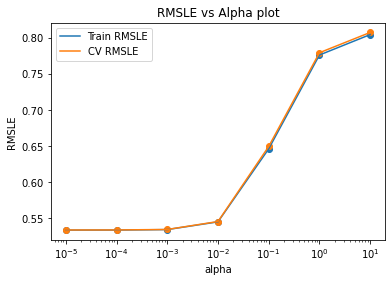

In [31]:
import matplotlib.pyplot as plt
cv_results = sgd_gs.cv_results_
mean_train_score = -1 * cv_results['mean_train_score']
mean_test_score = -1 * cv_results['mean_test_score']
alpha = cv_results['param_alpha'].data
plt.plot(alpha,mean_train_score,label='Train RMSLE')
plt.plot(alpha,mean_test_score,label='CV RMSLE')
plt.scatter(alpha,mean_train_score)
plt.scatter(alpha,mean_test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSLE')
plt.legend()
plt.title('RMSLE vs Alpha plot')
plt.show()

In [32]:
#best parameters for SGD regression
sgd_gs.best_params_

{'alpha': 1e-05}

In [33]:
import pickle
sgdr = SGDRegressor(alpha=0.00001,random_state=22,penalty='l2')
sgdr.fit(X_train_s,np.log1p(y_train['visitors']))
pickle.dump(sgdr, open('sgdr_model', 'wb'))

In [34]:
sgdr = pickle.load(open('sgdr_model', 'rb'))
y_predicted = sgdr.predict(X_train_s)
sgdr_rmsle_score = rmsle(y_true=y_train['visitors'],y_pred=np.expm1(y_predicted))
print('Train RMSLE for SGDRegressor:-',sgdr_rmsle_score)

Train RMSLE for SGDRegressor:- 0.533119908165104


In [35]:
y_test_predicted = sgdr.predict(X_test_s)
y_test_predicted = np.expm1(y_test_predicted)

In [36]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.drop(columns='visitors',inplace=True)
sample_submission['visitors'] = y_test_predicted
sample_submission.to_csv('sgdr_submission.csv',index=False)

### RandomForestRegressor Model

#### Hyperparameter Tuning

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=22)
# hyperparameters
parameters = {'max_depth': [1, 5, 10, 50],
              'n_estimators' : [5, 10, 50, 100, 250]}

rfr_gs = GridSearchCV(estimator=rfr,param_grid=parameters,scoring=score,n_jobs=-1,cv=3,verbose=10,return_train_score=True)
rfr_gs.fit(X_train,np.log1p(y_train['visitors']))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 74.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 74.2min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=22), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'n_estimators': [5, 10, 50, 100, 250]},
             return_train_score=True,
             scoring=make_scorer(rmsle_metric, greater_is_better=False),
             verbose=10)

In [10]:
#plotting scatter 3d plot for 
import plotly.graph_objects as go
cv_results = rfr_gs.cv_results_
cv_results
param_max_depth = cv_results['param_max_depth'].data
param_min_samples_split = cv_results['param_n_estimators'].data
mean_train_score =-1* cv_results['mean_train_score']
mean_test_score =-1 * cv_results['mean_test_score']
trace1 = go.Scatter3d(x=param_max_depth,y=param_min_samples_split,z=mean_train_score, name = 'train')
trace2 = go.Scatter3d(x=param_max_depth,y=param_min_samples_split,z=mean_test_score, name = 'cross validation')
data = [trace1, trace2]
layout = go.Layout(scene = dict(xaxis = dict(title='max_depth'),yaxis = dict(title='n_estimators'),
        zaxis = dict(title='RMSLE'),),title='RMSLE vs n_estimators & max_depth')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [11]:
#best parameter for RandomForestRegressor
rfr_gs.best_params_

{'max_depth': 10, 'n_estimators': 250}

In [18]:
import pickle
rfr = RandomForestRegressor(max_depth = 10, n_estimators = 250,random_state=22,n_jobs=-1,verbose=1)
rfr.fit(X_train,np.log1p(y_train['visitors']))
pickle.dump(rfr, open('rfr_model', 'wb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


In [30]:
rfr = pickle.load(open('rfr_model', 'rb'))
y_pred = rfr.predict(X_train)
rfr_rmsle_score = rmsle(y_true=y_train['visitors'],y_pred=np.expm1(y_pred))
print('Train RMSLE for RandomForestRegressor:-',rfr_rmsle_score)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.2s


Train RMSLE for RandomForestRegressor:- 0.4928645094635754


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.8s finished


In [23]:
y_test_predicted = rfr.predict(X_test)
y_test_predicted = np.expm1(y_test_predicted)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    0.8s finished


In [22]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.drop(columns='visitors',inplace=True)
sample_submission['visitors'] = y_test_predicted
sample_submission.to_csv('rfr_submission.csv',index=False)

### XGBoost

#### Hyperparameter Tuning

In [24]:
import xgboost as xgb


xgbr = xgb.XGBRegressor(random_state=22)
# hyperparameters
parameters = {'learning_rate':[0.1,0.01,0.001],
              'min_child_weight':[0.8,0.9,1],
              'subsample':[0.5,0.6,0.7],
              'colsample_bytree':[0.3,0.4,0.5],
              'max_depth': [2,4,8]}

xgbr_gs = GridSearchCV(estimator=xgbr,param_grid=parameters,scoring=score,n_jobs=-1,cv=3,verbose=3,return_train_score=True)
xgbr_gs.fit(X_train,np.log1p(y_train['visitors']))

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 81.5min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 132.5min finished


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5]

In [25]:
#best parameter for XgBoostRegressor
xgbr_gs.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 0.8,
 'subsample': 0.7}

In [10]:
import pickle
import xgboost as xgb
xgbr = xgb.XGBRegressor(colsample_bytree=0.5,learning_rate=0.1,max_depth=8,min_child_weight=0.8,subsample=0.7,random_state=22,n_jobs=-1,verbose=1)
xgbr.fit(X_train,np.log1p(y_train['visitors']))
pickle.dump(xgbr, open('xgbr_model', 'wb'))

[09:55:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [11]:
xgbr = pickle.load(open('xgbr_model', 'rb'))
y_pred = xgbr.predict(X_train)
xgbr_rmsle_score = rmsle(y_true=y_train['visitors'],y_pred=np.expm1(y_pred))
print('Train RMSLE for XGBRegressor:-',xgbr_rmsle_score)

Train RMSLE for XGBRegressor:- 0.47108870199176545


In [12]:
y_test_predicted = xgbr.predict(X_test)
y_test_predicted = np.expm1(y_test_predicted)

In [13]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.drop(columns='visitors',inplace=True)
sample_submission['visitors'] = y_test_predicted
sample_submission.to_csv('xgbr_submission.csv',index=False)

### AdaBoost Regressor

#### Hyperparameter Tuning

In [7]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
abr = AdaBoostRegressor(random_state=22)

#hyperparameters
parameters = {'learning_rate':[0.01,0.05,0.1,0.5,1],
              'n_estimators' : [10, 50, 100, 250]
             }
abr_gs = GridSearchCV(estimator=abr,param_grid=parameters,scoring=score,n_jobs=-1,cv=3,verbose=3,return_train_score=True)
abr_gs.fit(X_train,np.log1p(y_train['visitors']))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 46.6min finished


GridSearchCV(cv=3, estimator=AdaBoostRegressor(random_state=22), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'n_estimators': [10, 50, 100, 250]},
             return_train_score=True,
             scoring=make_scorer(rmsle_metric, greater_is_better=False),
             verbose=3)

In [8]:
#plotting scatter 3d plot for 
import plotly.graph_objects as go
cv_results = abr_gs.cv_results_
cv_results
param_learning_rate = cv_results['param_learning_rate'].data
param_n_estimators = cv_results['param_n_estimators'].data
mean_train_score =-1* cv_results['mean_train_score']
mean_test_score =-1 * cv_results['mean_test_score']
trace1 = go.Scatter3d(x=param_learning_rate,y=param_n_estimators,z=mean_train_score, name = 'train')
trace2 = go.Scatter3d(x=param_learning_rate,y=param_n_estimators,z=mean_test_score, name = 'cross validation')
data = [trace1, trace2]
layout = go.Layout(scene = dict(xaxis = dict(title='learning_rate'),yaxis = dict(title='n_estimators'),
        zaxis = dict(title='RMSLE'),),title='RMSLE vs n_estimators & learning_rate')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [9]:
#best hyperparameters for AdaBoost Regressor
abr_gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 250}

In [16]:
import pickle
abr = AdaBoostRegressor(learning_rate=0.01,n_estimators=250,random_state=22)
abr.fit(X_train,np.log1p(y_train['visitors']))
pickle.dump(abr, open('abr_model', 'wb'))

In [17]:
abr = pickle.load(open('abr_model', 'rb'))
y_pred = abr.predict(X_train)
abr_rmsle_score = rmsle(y_true=y_train['visitors'],y_pred=np.expm1(y_pred))
print('Train RMSLE for AdaBoostRegressor:-',abr_rmsle_score)

Train RMSLE for AdaBoostRegressor:- 0.5270819987742971


In [19]:
y_test_predicted = abr.predict(X_test)
y_test_predicted = np.expm1(y_test_predicted)

In [20]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.drop(columns='visitors',inplace=True)
sample_submission['visitors'] = y_test_predicted
sample_submission.to_csv('abr_submission.csv',index=False)

In [22]:
from prettytable import PrettyTable
    
row = PrettyTable()
row.field_names = ["Model", "Train RMSLE"]
row.add_row(["SGDRegressor", 0.5331])
row.add_row(["RandomForestRegressor", 0.4928])
row.add_row(["XGBRegressor", 0.4710])
row.add_row(["AdaBoostRegressor",0.5270])
print(row)

+-----------------------+-------------+
|         Model         | Train RMSLE |
+-----------------------+-------------+
|      SGDRegressor     |    0.5331   |
| RandomForestRegressor |    0.4928   |
|      XGBRegressor     |    0.471    |
|   AdaBoostRegressor   |    0.527    |
+-----------------------+-------------+


### Kaggle Submission

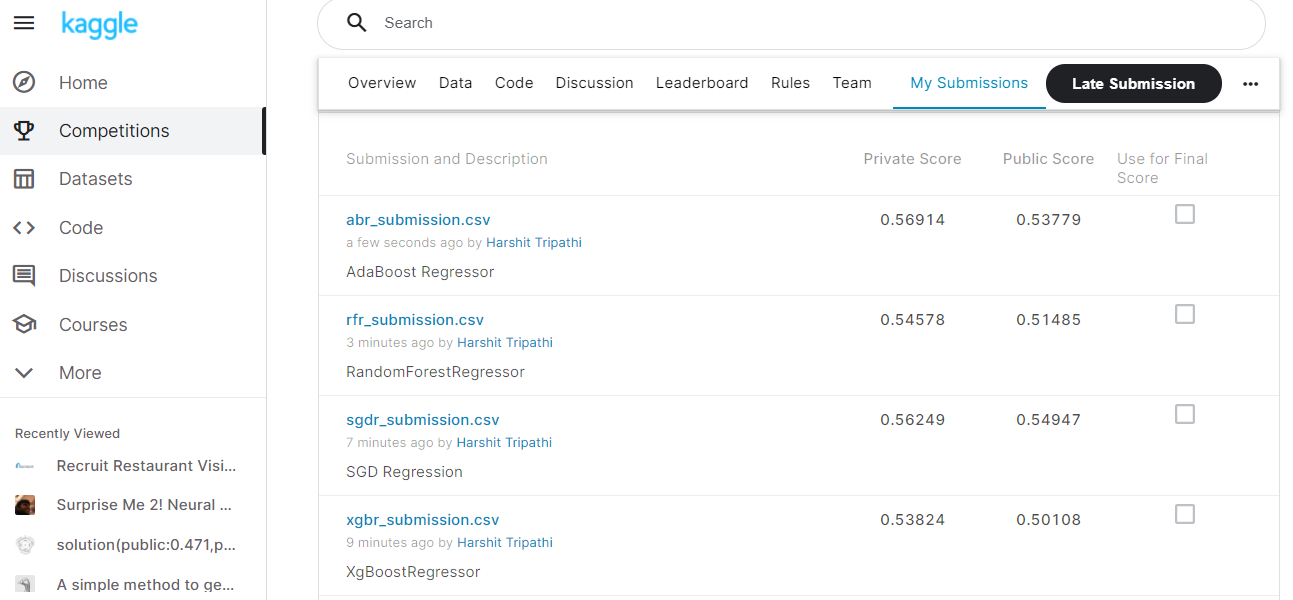